In [1]:
import iflai
import matplotlib.pyplot as plt
import iflai.ml.features as features
from iflai.ml.feature_selection import AutoFeatureSelection
from iflai.ml.feature_extractor import AmnisData
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import h5py
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from iflai.utils import list_of_dict_to_dict
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [2]:
data_path = "../../data/JCD"

feature_extractor = FeatureUnion([
    ("GLCMFeatures", features.GLCMFeatures()), 
                                  ("MaskBasedFeatures", features.MaskBasedFeatures()) ,
                                  ("GradientRMS", features.GradientRMS()) ,
                                  ("BackgroundMean", features.BackgroundMean()) ,
                                  ("CellShape", features.CellShape()),
                                  ("HistogramFeatures", features.HistogramFeatures()),
                                  ("Collocalization", features.Collocalization()),
                                  ("CenterOfCellsDistances", features.CenterOfCellsDistances()),
                                     ],
                                n_jobs = -1)

In [3]:
amnis_data = AmnisData(data_path, feature_extractor)

Metadata prepration starts...
experiment donor condition


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32266/32266 [00:09<00:00, 3314.37it/s]


...metadata prepration ended.


In [4]:
amnis_data.metadata

,file,experiment,donor,condition,object_number,set,label
0,../../data/JCD\experiment\donor\condition\0.h5,experiment,donor,condition,0,labeled,b'Anaphase'
1,../../data/JCD\experiment\donor\condition\1.h5,experiment,donor,condition,1,labeled,b'Anaphase'
2,../../data/JCD\experiment\donor\condition\10.h5,experiment,donor,condition,10,labeled,b'Anaphase'
3,../../data/JCD\experiment\donor\condition\100.h5,experiment,donor,condition,100,labeled,b'G1'
4,../../data/JCD\experiment\donor\condition\1000.h5,experiment,donor,condition,1000,labeled,b'G1'
...,...,...,...,...,...,...,...
32261,../../data/JCD\experiment\donor\condition\9995.h5,experiment,donor,condition,9995,labeled,b'G1'
32262,../../data/JCD\experiment\donor\condition\9996.h5,experiment,donor,condition,9996,labeled,b'G1'
32263,../../data/JCD\experiment\donor\condition\9997.h5,experiment,donor,condition,9997,labeled,b'G1'
32264,../../data/JCD\experiment\donor\condition\9998.h5,experiment,donor,condition,9998,labeled,b'G1'


In [5]:
import h5py

In [6]:
file = h5py.File("../../data/JCD/experiment/donor/condition/1000.h5", "r")

In [7]:
'lll' not in file.keys()

True

In [8]:
#amnis_data.segment_images()

In [9]:
%%time 
amnis_data.extract_features_for_all_samples()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32266/32266 [09:57<00:00, 53.99it/s]


Wall time: 10min 1s


In [10]:
amnis_data.df_features

,contrast_Ch1,dissimilarity_Ch1,homogeneity_Ch1,ASM_Ch1,energy_Ch1,correlation_Ch1,contrast_Ch2,dissimilarity_Ch2,homogeneity_Ch2,ASM_Ch2,...,correlation_distance_R3_Ch3_R2_Ch2,sqeuclidean_distance_R3_Ch3_R2_Ch2,manders_overlap_coefficient_R3_Ch3_R2_Ch2,intensity_correlation_quotient_R3_Ch3_R2_Ch2,cell_distance_Ch1_Ch2,weighted_cell_distance_Ch1_Ch2,cell_distance_Ch1_Ch3,weighted_cell_distance_Ch1_Ch3,cell_distance_Ch2_Ch3,weighted_cell_distance_Ch2_Ch3
0,856.028813,13.050671,0.345120,0.013915,0.117962,0.033997,796.263537,11.945604,0.559543,0.126509,...,NaN,8896142.0,NaN,-0.500000,0.961301,0.418203,-1.000000,-1.000000,-1.000000,-1.000000
1,449.523100,9.411823,0.363632,0.020897,0.144557,0.064762,1187.502484,12.332091,0.670259,0.319461,...,NaN,9108100.0,NaN,-0.500000,0.811325,0.926564,-1.000000,-1.000000,-1.000000,-1.000000
2,728.559364,12.143070,0.360249,0.013317,0.115399,0.005485,974.934675,11.610780,0.658138,0.284230,...,1.583945,16903905.0,0.000126,-0.491736,0.703279,0.767375,0.406757,0.160736,0.645454,0.886965
3,713.765524,9.901143,0.417934,0.019923,0.141150,-0.001784,719.477397,8.876801,0.644943,0.153222,...,1.514821,18699213.0,0.000096,-0.494720,0.844903,0.477059,1.779079,1.264457,1.185093,1.417648
4,642.186289,9.480378,0.442205,0.020879,0.144494,-0.060637,696.456781,8.709637,0.625571,0.110563,...,NaN,6223121.0,NaN,-0.500000,1.890173,1.647618,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32261,948.997268,12.196970,0.359086,0.013374,0.115647,0.004135,581.722553,9.840785,0.533225,0.067988,...,NaN,7447458.0,NaN,-0.500000,3.065338,1.696766,-1.000000,-1.000000,-1.000000,-1.000000
32262,647.271237,9.514158,0.388146,0.015297,0.123680,0.005026,744.205415,8.733482,0.646292,0.145355,...,NaN,6905581.0,NaN,-0.500000,0.757400,0.671585,-1.000000,-1.000000,-1.000000,-1.000000
32263,831.900646,11.616990,0.297234,0.007509,0.086653,0.230261,554.793095,10.482116,0.464152,0.044892,...,1.496498,31518768.0,0.000077,-0.485308,1.358998,1.256271,0.422110,0.959729,1.753070,2.161695
32264,413.807253,7.950323,0.397843,0.016661,0.129078,-0.005284,968.273721,9.171883,0.626953,0.109197,...,NaN,8254010.0,NaN,-0.500000,0.370324,0.218542,-1.000000,-1.000000,-1.000000,-1.000000


In [11]:
amnis_data.df_features = amnis_data.df_features.fillna(0.)
amnis_data.df_features = amnis_data.df_features.loc[:, amnis_data.df_features.std() > .0]

In [12]:
amnis_data.df_features = amnis_data.df_features.fillna(0.)

In [13]:
index_train , index_test = train_test_split(amnis_data.metadata.index, stratify = amnis_data.metadata["label"], random_state=42)

In [14]:
data_map = dict(zip(sorted(set(amnis_data.metadata.loc[index_train, "label"])), np.arange(len(set(amnis_data.metadata.loc[index_train, "label"])))))

In [15]:
y_train = [data_map.get(i) for i in amnis_data.metadata.loc[index_train, "label"]]

In [16]:
oversample = RandomOverSampler(random_state=42, sampling_strategy='all')

In [17]:
index_train, y_train = oversample.fit_resample(np.asarray(index_train).reshape(-1, 1), np.asarray(y_train))

In [18]:
index_train = index_train.T[0]

In [19]:
from collections import Counter
Counter(y_train)

Counter({2: 10750, 5: 10750, 1: 10750, 4: 10750, 3: 10750, 6: 10750, 0: 10750})

In [20]:
pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), 
                           ('AutoFeatureSelection', AutoFeatureSelection(top_k = 60)),
                           ('XGBClassifier', XGBClassifier(n_jobs = -1, eval_metric='logloss')) 
                          ],  verbose=True)
pipeline.fit(amnis_data.df_features.loc[index_train,:],  y_train)

[Pipeline] ...... (step 1 of 3) Processing MinMaxScaler, total=   0.2s
Calculating mutual info
Calculating SVC
Calculating random forest
Calculating l1 logistic regression
Calculating l2 logistic
Calculating xgb
From 243 initial features Selected (correlated): 129
From 243 initial features Selected (uncorrelated): 60
[Pipeline]  (step 2 of 3) Processing AutoFeatureSelection, total=65.4min
[Pipeline] ..... (step 3 of 3) Processing XGBClassifier, total=  31.7s


Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('AutoFeatureSelection', AutoFeatureSelection(top_k=60)),
                ('XGBClassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_

In [21]:
selected_features = pipeline.steps[1][1].selected_features
selected_feature_names = amnis_data.df_features.columns[selected_features]

In [22]:
y_test = [data_map.get(i) for i in amnis_data.metadata.loc[index_test, "label"]]

In [23]:
from sklearn.metrics import (plot_confusion_matrix, 
                             matthews_corrcoef, 
                             classification_report,
                             confusion_matrix, 
                             accuracy_score, 
                             balanced_accuracy_score, 
                             cohen_kappa_score, 
                             f1_score,  
                             precision_score, recall_score)
from statsmodels.stats.contingency_tables import mcnemar
import os

def classification_complete_report(estimator, X, y_true, plot = True, class_names=[], path_to_save_fig = "../../images", file_name="test.svg" ): 
    y_pred = estimator.predict(X)
    print(classification_report(y_true, y_pred,target_names=class_names))
    print(15*"----")
    print("matthews correlation coeff: %.4f" % (matthews_corrcoef(y_true, y_pred)) )
    print("Cohen Kappa score: %.4f" % (cohen_kappa_score(y_true, y_pred)) )
    print("Accuracy: %.4f & balanced Accuracy: %.4f" % (accuracy_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred)) )
    print("macro F1 score: %.4f & micro F1 score: %.4f" % (f1_score(y_true, y_pred, average = "macro"), f1_score(y_true, y_pred, average = "micro")) )
    print("macro Precision score: %.4f & micro Precision score: %.4f" % (precision_score(y_true, y_pred, average = "macro"), precision_score(y_true, y_pred, average = "micro")) )
    print("macro Recall score: %.4f & micro Recall score: %.4f" % (recall_score(y_true, y_pred, average = "macro"), recall_score(y_true, y_pred, average = "micro")) )
    print(15*"----")
    
    if plot:
        plt.rcParams.update({'font.size': 13})
        disp = plot_confusion_matrix(estimator, X, y_true,display_labels=class_names, cmap=plt.cm.Greys, xticks_rotation='vertical')
        plt.setp(disp.ax_.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
        #disp.figure_.savefig(os.path.join(path_to_save_fig, file_name), bbox_inches='tight')
        disp.figure_.savefig(os.path.join(path_to_save_fig, "{}.png".format(file_name)), bbox_inches='tight')
        disp.figure_.savefig(os.path.join(path_to_save_fig, "{}.svg".format(file_name)), bbox_inches='tight')
    

              precision    recall  f1-score   support

    Anaphase       1.00      0.50      0.67         4
          G1       0.90      0.88      0.89      3583
          G2       0.83      0.85      0.84      2150
   Metaphase       0.42      0.29      0.34        17
    Prophase       0.65      0.51      0.57       152
           S       0.68      0.70      0.69      2154
   Telophase       0.78      1.00      0.88         7

    accuracy                           0.82      8067
   macro avg       0.75      0.68      0.70      8067
weighted avg       0.82      0.82      0.82      8067

------------------------------------------------------------
matthews correlation coeff: 0.7212
Cohen Kappa score: 0.7211
Accuracy: 0.8158 & balanced Accuracy: 0.6758
macro F1 score: 0.6963 & micro F1 score: 0.8158
macro Precision score: 0.7502 & micro Precision score: 0.8158
macro Recall score: 0.6758 & micro Recall score: 0.8158
------------------------------------------------------------


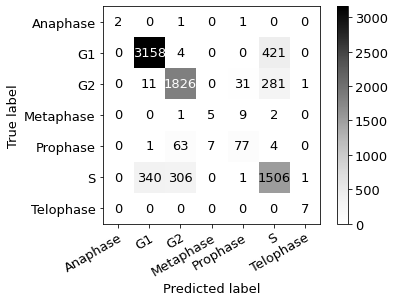

In [24]:
classification_complete_report(pipeline, 
                               amnis_data.df_features.loc[index_test,:], 
                               y_test, class_names=[i.decode("utf-8") for i in list(data_map.keys())], file_name="CM_JCD_all_oversampling")

In [25]:
channels = ["BF", "PI", "MPM2"]

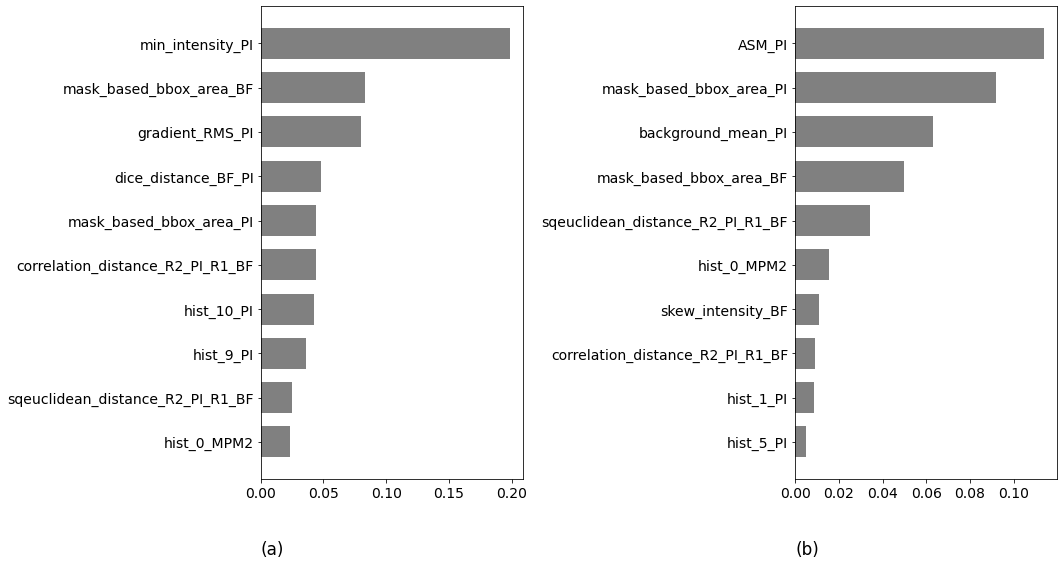

In [26]:

from sklearn.inspection import permutation_importance
plt.rcParams.update({'font.size': 14})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

tree_importance_sorted_idx = np.argsort(pipeline.steps[2][1].feature_importances_)[-10:]

tree_indices = np.arange(0, 10) + 0.5

ax1.barh(tree_indices, 
         pipeline.steps[2][1].feature_importances_[tree_importance_sorted_idx], 
         height=0.7, color  = "grey")
important_feat_labels = amnis_data.df_features.columns[selected_features].values[tree_importance_sorted_idx]

for i,feat in enumerate(important_feat_labels):
    feat_split = feat.split("_")
    for j,w in enumerate(feat_split):
        if "Ch" in w:
            feat_split[j] = channels[int(w.replace("Ch",""))-1]
    important_feat_labels[i] = "_".join(feat_split)
#labels = [i.replace(i.split('_')[-1], channels[int(i.split('_')[-1].replace("Ch",""))-1]) for i in important_feat_labels] 
ax1.set_yticklabels(important_feat_labels)
ax1.set_yticks(tree_indices)
ax1.set_title("(a)", loc='left', y=-0.15,pad=-4)


result = permutation_importance(pipeline, 
                                amnis_data.df_features.loc[index_test,:],  
                                y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()[-10:]
perm_feat_labels = amnis_data.df_features.columns.values[perm_sorted_idx]
for i,feat in enumerate(perm_feat_labels):
    feat_split = feat.split("_")
    for j,w in enumerate(feat_split):
        if "Ch" in w:
            feat_split[j] = channels[int(w.replace("Ch",""))-1]
    perm_feat_labels[i] = "_".join(feat_split)
#labels = [i.replace(i.split('_')[-1], channels[int(i.split('_')[-1].replace("Ch",""))-1]) for i in perm_feat_labels]
ax2.barh(tree_indices, 
       result.importances[perm_sorted_idx].T.mean(axis=0), 
       height=0.7, color  = "grey")
ax2.set_yticklabels(perm_feat_labels)
ax2.set_yticks(tree_indices)
ax2.set_title("(b)", loc='left', y=-0.15,pad=-4)
fig.tight_layout()
fig.savefig(os.path.join("../../images", "fetaure_permutation_jcd_oversampl_bar.png"), bbox_inches='tight')
fig.savefig(os.path.join("../../images", "fetaure_permutation_jcd_oversampl_bar.svg"), bbox_inches='tight')

In [95]:
channel_importance_xgb = {"Ch1" : 0., "Ch2" : 0., "Ch3": 0.}

for i,f in enumerate(selected_feature_names):
    value = pipeline.steps[2][1].feature_importances_[i]
    if "Ch1" in f:
        channel_importance_xgb["Ch1"] = channel_importance_xgb["Ch1"] + value
    elif "Ch2" in f:
        channel_importance_xgb["Ch2"] = channel_importance_xgb["Ch2"] + value
    elif "Ch3" in f:
        channel_importance_xgb["Ch3"] = channel_importance_xgb["Ch3"] + value


channel_importance_permutation = {"Ch1" : 0., "Ch2" : 0., "Ch3": 0.}

for i,f in enumerate(amnis_data.df_features.columns):
    value = result['importances_mean'][i]
    if "Ch1" in f:
        channel_importance_permutation["Ch1"] = channel_importance_permutation["Ch1"] + value
    elif "Ch2" in f:
        channel_importance_permutation["Ch2"] = channel_importance_permutation["Ch2"] + value
    elif "Ch3" in f:
        channel_importance_permutation["Ch3"] = channel_importance_permutation["Ch3"] + value


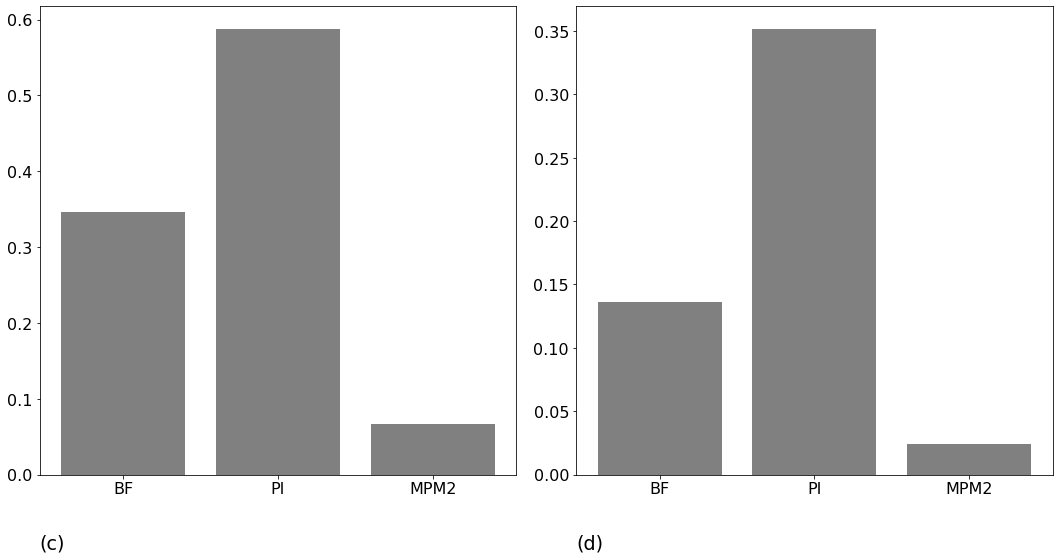

In [97]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.bar(channels, channel_importance_xgb.values(), color="grey")
ax1.set_title("(c)", loc='left', y=-0.15,pad=-4)

ax2.bar(channels, channel_importance_permutation.values(), color="grey")
ax2.set_title("(d)", loc='left', y=-0.15,pad=-4)
fig.tight_layout()
fig.savefig(os.path.join("../../images", "channel_importance_jcd_oversampl.png"), bbox_inches='tight')
fig.savefig(os.path.join("../../images", "channel_importance_jcd_oversampl.svg"), bbox_inches='tight')

In [34]:
channel_ranking_gini = pd.DataFrame(data={'channels': channels, 'importance': channel_importance_xgb.values()})
channel_ranking_perm_import = pd.DataFrame(data={'channels': channels, 'importance': channel_importance_permutation.values()})

In [58]:
test_data = amnis_data.df_features.loc[index_test,:].copy(deep=True)

In [49]:
test_data.columns

Index(['contrast_Ch1', 'dissimilarity_Ch1', 'homogeneity_Ch1', 'ASM_Ch1',
       'energy_Ch1', 'correlation_Ch1', 'contrast_Ch2', 'dissimilarity_Ch2',
       'homogeneity_Ch2', 'ASM_Ch2',
       ...
       'correlation_distance_R3_Ch3_R2_Ch2',
       'sqeuclidean_distance_R3_Ch3_R2_Ch2',
       'manders_overlap_coefficient_R3_Ch3_R2_Ch2',
       'intensity_correlation_quotient_R3_Ch3_R2_Ch2', 'cell_distance_Ch1_Ch2',
       'weighted_cell_distance_Ch1_Ch2', 'cell_distance_Ch1_Ch3',
       'weighted_cell_distance_Ch1_Ch3', 'cell_distance_Ch2_Ch3',
       'weighted_cell_distance_Ch2_Ch3'],
      dtype='object', length=243)

In [50]:
from IPython.core.debugger import Tracer

In [59]:
def calculate_aopc(channel_ranking, test_df, method='', ascending=True, perturb=False):
    #channel_ranking = pd.DataFrame(data={"channels":channels_ranking, "importance": importance})
    sorted_channels = channel_ranking.sort_values(by="importance", ascending=ascending)
    y_proba = pipeline.predict_proba(test_df)
    y_true_proba = np.array([j[i] for (i,j) in zip(y_test, y_proba)])
    channels_to_permute=[]
    differences = []
    # calculate (f^0 - f^k)
    for i in range(len(sorted_channels)):
        #Tracer()()
        channel_to_perturbate = np.where(np.asarray(channels)==sorted_channels.iloc[i]["channels"])[0][0]
        for ch in test_df.columns:
            if "Ch" + str(channel_to_perturbate + 1) in ch:
                test_df[ch] = test_df[ch].mean()            
        y_permut_proba = pipeline.predict_proba(test_df)
        y_true_permut_proba = [j[i] for (i,j) in zip(y_test, y_permut_proba)]
        differences.append(y_true_proba-np.array(y_true_permut_proba))
    stacked_diff = np.stack(differences)
    # calculate summ(f^0-f^k)
    diff_accumulated = []
    for idx, diff in enumerate(stacked_diff):
        if idx==0:
            diff_accumulated.append(stacked_diff[idx])
        else:
            diff_accumulated.append(diff_accumulated[idx-1] + stacked_diff[idx])
    diff_accumulated = np.stack(diff_accumulated)
    # mean over the test set
    diff_accumulated_mean = np.mean(diff_accumulated, axis=-1)
    # divide by 1/L+1
    diff_accumulated_mean_norm = np.array([])
    for ix, d in enumerate(diff_accumulated_mean):
        diff_accumulated_mean_norm = np.append(diff_accumulated_mean_norm, d/(ix+1))
    # insert (0,0)
    diff_accumulated_mean_norm_started_from_0 = np.insert(diff_accumulated_mean_norm,0,0.0)
    # plot line
    x = np.arange(len(diff_accumulated_mean_norm_started_from_0))
    plt.xlabel("permutation steps")
    plt.ylabel("AOPC")
    plt.plot(x, diff_accumulated_mean_norm_started_from_0, color ="red")
    #plt.show()
    plt.savefig(os.path.join("../../images", "aopc-{}.svg".format(method)))
    return diff_accumulated_mean_norm_started_from_0

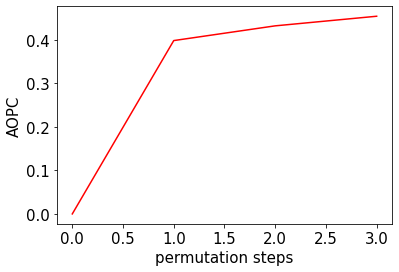

In [45]:
res_gini = calculate_aopc(channel_ranking_gini, test_data, method="gini-index-jcd", ascending=False)

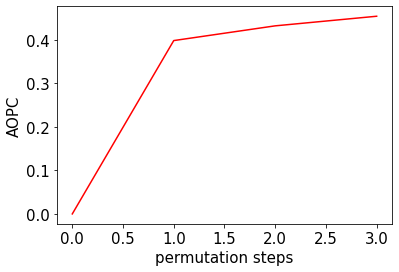

In [52]:
res_perm_import = calculate_aopc(channel_ranking_perm_import, test_data, method="permutation-importnace-jcd", ascending=False)

In [72]:
res_perm_import

array([0.        , 0.39804208, 0.43186346, 0.45391067])

In [68]:
channel_ranking_random = pd.DataFrame(data={'channels': channels, 'importance': np.random.randint(12, size=3)})

In [69]:
channel_ranking_random

,channels,importance
0,BF,11
1,PI,7
2,MPM2,2


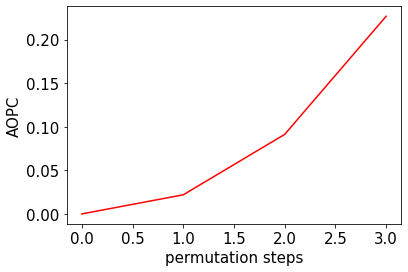

In [60]:
res_random = calculate_aopc(channel_ranking_random, test_data, method="random-jcd", ascending=False)

In [76]:
x

array([0, 1, 2, 3])

In [73]:
x = np.arange(len(res_random))

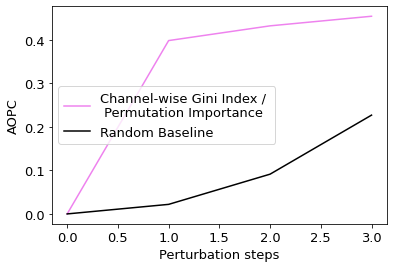

In [78]:
plt.rcParams.update({'font.size': 13})
plt.plot(x, res_perm_import, label  = "Channel-wise Gini Index / \n Permutation Importance", color="violet")
plt.plot(x, res_random, label  = "Random Baseline", color="black")
plt.xlabel('Perturbation steps')
plt.ylabel('AOPC')
plt.legend()
plt.savefig(os.path.join("../../images", "aopc-all-jcd.png"))
plt.savefig(os.path.join("../../images", "aopc-all-jcd.svg"))

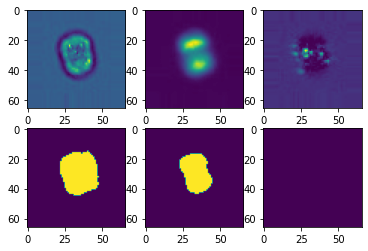

In [23]:
image, mask = amnis_data.get_image_mask()


fix, ax = plt.subplots(2,3)

ax[0,0].imshow(image[:,:,0])
ax[0,1].imshow(image[:,:,1])
ax[0,2].imshow(image[:,:,2])

ax[1,0].imshow(mask[:,:,0])
ax[1,1].imshow(mask[:,:,1])
ax[1,2].imshow(mask[:,:,2])

In [79]:
from IPython.core.debugger import Tracer

In [89]:
from skimage.util import crop

def crop_pad_h_w(image_dummy,reshape_size):
    if image_dummy.shape[0] < reshape_size:
        h1_pad = ( reshape_size - image_dummy.shape[0])/2
        h1_pad = int(h1_pad)
        h2_pad = reshape_size - h1_pad - image_dummy.shape[0]
        h1_crop = 0
        h2_crop = 0
    else:
        h1_pad = 0
        h2_pad = 0
        h1_crop = ( reshape_size - image_dummy.shape[0])/2
        h1_crop = abs(int(h1_crop))
        h2_crop = image_dummy.shape[0]- reshape_size - h1_crop
        
    if image_dummy.shape[1] < reshape_size:
        w1_pad = (reshape_size - image_dummy.shape[1])/2
        w1_pad = int(w1_pad)
        w2_pad = reshape_size - w1_pad - image_dummy.shape[1]
        w1_crop = 0
        w2_crop = 0
    else:
        w1_pad = 0
        w2_pad = 0
        w1_crop = (reshape_size - image_dummy.shape[1])/2
        w1_crop = abs(int(w1_crop))
        w2_crop = image_dummy.shape[1]- reshape_size - w1_crop
        
    h = [h1_crop, h2_crop, h1_pad, h2_pad]
    w = [w1_crop, w2_crop, w1_pad, w2_pad] 
    return h, w

def plot_images_with_metadata(metadata,  
                              figsize = None,
                    channel_colors = ["Greys", "Greens", "Oranges"],
                    image_size = 128,
                             channels=[]):
    metadata_dummy = metadata.assign(P=[3,0,1,4,5,2,6]).sort_values('P').drop('P', 1).copy()
    metadata_dummy = metadata_dummy.reset_index(drop = True)
    nrows = len(metadata_dummy)
    ncols = len(channel_colors)
    plt.rcParams.update({'font.size': 12})
    if figsize is None:
        figsize = ( ncols*1.5, nrows*1.5 )
    fig,ax = plt.subplots(nrows, ncols, figsize = figsize, tight_layout = True, sharex=True, sharey=True,)
    
    vmin = [4095.]*ncols
    vmax = [0.]*ncols
    labels = []
    for i in range(nrows):
        h5_file_ = h5py.File(metadata_dummy.loc[i,"file"], "r")
        image = h5_file_.get("image")[()]
        labels.append(metadata_dummy.loc[i,"label"].decode("utf-8"))
        for j, ch in enumerate(range(ncols)):
            vmin[j] = min(vmin[j], image[:,:,ch].min() )
            vmax[j] = max(vmax[j], image[:,:,ch].max() )
        
    for i in range(nrows):
        h5_file_ = h5py.File(metadata_dummy.loc[i,"file"], "r")
        image = h5_file_.get("image")[()]         
        h, w = crop_pad_h_w(image, image_size)
        h1_crop, h2_crop, h1_pad, h2_pad = h 
        w1_crop, w2_crop, w1_pad, w2_pad = w 
        for j, ch in enumerate(channel_colors):
            image_dummy = crop(image[:,:,j], ((h1_crop,h2_crop),(w1_crop,w2_crop)))            
            image_dummy = np.pad(image_dummy, 
                                     ((h1_pad,h2_pad),(w1_pad,w2_pad)), 
                                     'constant', 
                                     constant_values = np.mean(image_dummy) )
            ax[i,j].imshow(image_dummy, cmap = channel_colors[j] , vmin = vmin[j], vmax = vmax[j] )
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
            ax[i,j].tick_params(axis=u'both', which=u'both',length=0)
            if i == len(ax) - 1:
                ax[i,j].set_xlabel("{}".format(channels[j]), fontsize=20)
            if j == 0:
                ax[i,j].set_ylabel("{}".format(labels[i]), fontsize=15)
        h5_file_.close()
    #fig.text(0.5, 0.04, 'channels', ha='center')
    #fig.text(0.04, 0.5, 'classes', va='center', rotation='vertical')
    fig.savefig(os.path.join("../../images","{}.png".format("jcd")), bbox_inches='tight')
    plt.tight_layout()

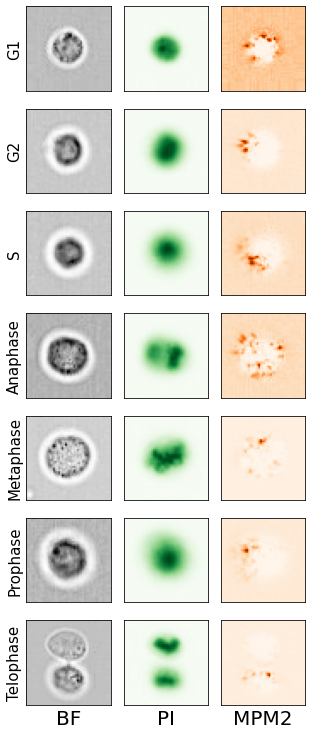

In [90]:
plot_images_with_metadata(amnis_data.metadata.groupby('label').apply(lambda s: s.sample(1)).reset_index(drop = True) ,  
                              figsize = None,
                    image_size = 50, channels=channels)

In [75]:
channel_colors = ["Greys", "Greens", "Oranges"]
image_size = 50
metadata_dummy = amnis_data.metadata.groupby('label').apply(lambda s: s.sample(1)).reset_index(drop = True).loc[1,"file"]
nrows = len(metadata_dummy)
ncols = len(channel_colors)
figsize = ( ncols*2, nrows*2 )

In [76]:
metadata_dummy

'../../data/JCD\\experiment\\donor\\condition\\11413.h5'

In [77]:
import torch

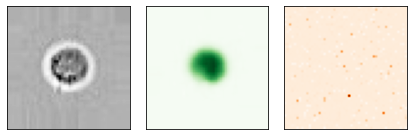

In [81]:
fig,ax = plt.subplots(1, ncols, figsize = figsize, tight_layout = True, sharex=True, sharey=True,)
   
vmin = [4095.]*ncols
vmax = [0.]*ncols
h5_file_ = h5py.File(metadata_dummy, "r")
image = h5_file_.get("image")[()]  

for j, ch in enumerate(range(ncols)):
    vmin[j] = min(vmin[j], image[:,:,ch].min() )
    vmax[j] = max(vmax[j], image[:,:,ch].max() )
h, w = crop_pad_h_w(image, image_size)
h1_crop, h2_crop, h1_pad, h2_pad = h 
w1_crop, w2_crop, w1_pad, w2_pad = w 
for j, ch in enumerate(channel_colors):
    image_dummy = crop(image[:,:,j], ((h1_crop,h2_crop),(w1_crop,w2_crop)))            
    image_dummy = np.pad(image_dummy, 
                                     ((h1_pad,h2_pad),(w1_pad,w2_pad)), 
                                     'constant', 
                                     constant_values = np.mean(image_dummy) )
    #Tracer()()
    if j == 2:
        
        channel_shape = image_dummy.shape
        image_dummy = image_dummy.flatten()[torch.randperm(len(image_dummy.flatten()))].reshape(
                        channel_shape)
        #Tracer()()
    ax[j].imshow(image_dummy, cmap = channel_colors[j] , vmin = vmin[j], vmax = vmax[j] )
    plt.setp(ax[j].get_xticklabels(), visible=False)
    plt.setp(ax[j].get_yticklabels(), visible=False)
    ax[j].tick_params(axis=u'both', which=u'both',length=0)
h5_file_.close()
#fig.savefig(os.path.join("../../images","{}.png".format("jcd_original")), bbox_inches='tight')
plt.tight_layout()

In [71]:
test=np.array([8237, 3382, 2361, 23748, 26770, 23949, 26217, 2657, 12907, 12557, 9901, 28753, 26388, 18315, 9953, 1279, 483, 29762, 10375, 15787, 19051, 2360, 15455, 3587, 18292, 15161, 23610, 3242, 14355, 6639, 26804, 8859, 23863, 8840, 14873, 7827, 20791, 4885, 26928, 3376, 13621, 29907, 25215, 22651, 14878, 23525, 26595, 3688, 17113, 26824, 25818, 5062, 30105, 24690, 3709, 28211, 21721, 2321, 25599, 29410, 21245, 31452, 4282, 29187, 24573, 9878, 8000, 3446, 644, 22650, 1335, 13040, 19767, 26185, 16244, 31665, 21214, 13237, 3835, 11641, 4531, 24304, 184, 32152, 2830, 3798, 2016, 5724, 14967, 23031, 4668, 19491, 8718, 24518, 18181, 24615, 24372, 6955, 25187, 19658, 14280, 11520, 7434, 23161, 18419, 9989, 7944, 1516, 13962, 25255, 494, 26071, 15251, 26837, 28784, 9727, 17183, 9126, 18414, 4571, 17614, 3525, 28278, 25052, 1204, 18733, 4201, 22394, 18005, 19869, 4714, 374, 10896, 13991, 20660, 22152, 18343, 5290, 16743, 8031, 16729, 3130, 821, 19211, 17013, 21072, 7150, 7269, 31594, 26072, 21791, 27380, 28244, 3787, 19620, 9722, 14850, 27137, 13317, 5825, 31670, 2478, 12442, 12667, 26485, 605, 15491, 28725, 10831, 22164, 4042, 31518, 20299, 10842, 20721, 23386, 24865, 29958, 6284, 16696, 7578, 7340, 15998, 3155, 281, 2502, 11972, 25068, 18715, 17557, 4092, 27294, 29398, 8727, 24955, 23843, 19948, 25833, 11, 7339, 6752, 26351, 7581, 28703, 22672, 16917, 23766, 10170, 21968, 14618, 23652, 30304, 19502, 6349, 9981, 6105, 29284, 31383, 11484, 723, 17148, 22157, 20793, 30586, 26887, 30567, 16194, 9103, 22575, 31661, 8018, 17678, 31432, 12527, 3405, 17967, 23714, 15446, 11855, 27814, 3005, 29645, 15198, 20116, 13329, 31738, 5200, 14352, 28782, 26009, 32106, 23850, 31657, 21179, 1524, 8133, 8033, 6404, 21969, 21166, 9264, 7751, 17431, 20037, 4184, 27590, 1097, 10211, 18290, 19859, 4984, 18502, 31241, 18262, 9229, 27825, 27387, 7263, 4955, 870, 21805, 15786, 30979, 20794, 639, 26601, 5265, 26069, 2545, 21116, 21041, 25149, 5844, 17633, 31103, 3494, 28466, 27043, 23506, 28407, 17139, 24015, 7542, 10597, 18466, 22357, 2967, 25492, 18219, 27109, 10483, 11859, 14654, 17022, 13340, 31428, 27430, 25244, 5593, 28534, 7121, 4296, 15091, 16119, 3550, 8274, 26397, 11655, 1666, 31688, 18596, 2524, 2381, 719, 26498, 9079, 9534, 28754, 22026, 16144, 11773, 17925, 24116, 1760, 25519, 12858, 29525, 8790, 2742, 19270, 8262, 6767, 2069, 15253, 22758, 11963, 19194, 24101, 1978, 3412, 15526, 14121, 7466, 31993, 16457, 26057, 28962, 20946, 27213, 137, 17838, 12030, 28502, 2225, 1183, 14440, 17182, 19985, 30974, 11158, 16765, 1567, 400, 25547, 7360, 14374, 5812, 2914, 21588, 16245, 12471, 4755, 6323, 2215, 7327, 29560, 17720, 16609, 19360, 11207, 5681, 20109, 5744, 140, 11868, 26510, 27553, 7433, 16271, 2243, 26212, 10574, 22537, 26935, 3485, 18131, 21135, 25744, 3613, 26242, 26295, 31987, 10943, 25884, 22205, 18910, 29941, 28069, 15292, 8037, 26146, 23384, 31834, 20731, 24913, 23944, 5049, 9159, 19341, 23958, 9661, 16330, 26324, 9548, 31580, 12232, 30522, 18473, 17061, 3048, 16233, 28617, 7647, 28866, 10111, 10229, 2701, 18109, 21319, 30064, 12051, 20733, 23915, 22478, 4290, 28408, 21310, 31275, 21329, 13159, 949, 8121, 29711, 10956, 9731, 19449, 12187, 27901, 28046, 3592, 3398, 29417, 956, 29536, 13459, 16834, 30927, 31161, 7440, 27701, 921, 10698, 9701, 8993, 20956, 6401, 30697, 30630, 24897, 11140, 25766, 25677, 18729, 677, 21785, 13228, 5650, 28779, 7529, 19577, 23857, 20048, 9699, 30863, 27881, 7276, 14153, 3045, 21274, 9030, 13789, 8633, 249, 30386, 29530, 4514, 13983, 5277, 29137, 25569, 22050, 25111, 4339, 20419, 2300, 671, 18565, 25020, 23791, 7428, 25437, 15064, 24799, 17860, 24662, 2986, 18849, 27083, 26632, 1184, 28469, 24777, 2955, 22692, 22281, 867, 9221, 9632, 12412, 30733, 14329, 21675, 20750, 8844, 11846, 7220, 30377, 24577, 10747, 23580, 27095, 12135, 27930, 24611, 28134, 22044, 20504, 17339, 12550, 28666, 10789, 25877, 31154, 19596, 6028, 3673, 9118, 23556, 14409, 26784, 24588, 1220, 28837, 10825, 29245, 10296, 9582, 8637, 31477, 9086, 28078, 31469, 2155, 4761, 18816, 28522, 30278, 18710, 975, 30354, 31948, 9149, 5293, 4789, 23950, 4827, 24961, 19281, 30465, 20730, 13300, 2601, 7379, 6820, 10741, 20136, 20663, 9184, 16769, 26328, 13772, 21302, 17365, 1342, 787, 29776, 27359, 31698, 7566, 4660, 4143, 19973, 17155, 6005, 24427, 16474, 1120, 764, 8480, 11008, 30742, 27745, 25212, 29715, 7783, 23804, 4864, 25556, 31339, 208, 21824, 9427, 4309, 521, 20044, 11974, 25074, 1339, 31437, 18033, 30773, 26059, 10655, 447, 18990, 9821, 28070, 28906, 29330, 24968, 7414, 9370, 31829, 25936, 6731, 14539, 13844, 9339, 27196, 16191, 19071, 10363, 10476, 19754, 15283, 14337, 10766, 339, 21477, 21173, 2448, 18339, 11244, 308, 15766, 765, 29901, 28077, 3535, 15338, 22828, 15578, 4500, 819, 18276, 3019, 19510, 26974, 7424, 19996, 19450, 672, 43, 2737, 13853, 13794, 31351, 9165, 9501, 20557, 18040, 1084, 2471, 19255, 22919, 23694, 13367, 8028, 3433, 30088, 26780, 15956, 21210, 21690, 12875, 31730, 10692, 5842, 9594, 12091, 25118, 18204, 28857, 30861, 21221, 11149, 26854, 21416, 28891, 25001, 31601, 31468, 25887, 26342, 25473, 6595, 7842, 3034, 26959, 17427, 8593, 11847, 19756, 24988, 4284, 16031, 8924, 17569, 31732, 10249, 14877, 29777, 17200, 31147, 22507, 15475, 9526, 24957, 3564, 26544, 31188, 12189, 21055, 2085, 14158, 7153, 22049, 6400, 15041, 4344, 6385, 16910, 25777, 25726, 890, 17541, 6539, 30984, 20756, 10749, 9016, 11511, 6930, 2572, 1062, 20790, 1246, 29106, 24920, 15457, 19599, 8776, 31516, 11902, 2124, 445, 8252, 4793, 16407, 32115, 15101, 7224, 14800, 2912, 14378, 25256, 11796, 31839, 3286, 29651, 26856, 21578, 20385, 11181, 14950, 23877, 18848, 17325, 11587, 27987, 17948, 12919, 9040, 21627, 1331, 10316, 11463, 1125, 8886, 10965, 29236, 16358, 26629, 12859, 30481, 26951, 20352, 7585, 23876, 6920, 29743, 7889, 28882, 14080, 6220, 2439, 24463, 30356, 13277, 24309, 23426, 11199, 19674, 21593, 1509, 10940, 19872, 14853, 16858, 7138, 11500, 11470, 26023, 18250, 18548, 18159, 25402, 14600, 29494, 22365, 12826, 12340, 29976, 14112, 19002, 31907, 16441, 23639, 1213, 12305, 7, 20588, 18855, 25038, 15940, 26752, 12096, 15716, 31376, 1648, 6844, 14495, 593, 15031, 12624, 264, 11085, 6709, 10009, 9651, 9122, 6317, 9643, 5309, 2858, 15148, 17961, 14855, 25309, 26257, 31964, 9074, 15236, 11635, 20994, 25121, 25448, 21684, 8631, 32221, 11789, 24459, 1405, 942, 12807, 31060, 16963, 26043, 30780, 30213, 25060, 1186, 15430, 1685, 29815, 5695, 27595, 4028, 11905, 27846, 16273, 26769, 9000, 14923, 5110, 17501, 4614, 30559, 5982, 17597, 10867, 28260, 15895, 26628, 26588, 15006, 4432, 280, 22748, 23038, 16655, 19538, 31861, 4118, 21664, 1455, 19048, 25137, 24894, 17897, 14266, 8191, 6086, 12903, 6366, 27914, 13223, 17081, 32233, 907, 28094, 2581, 15816, 22680, 22372, 10644, 24371, 876, 1529, 8873, 30242, 2077, 19889, 1259, 14545, 5499, 22765, 25642, 15702, 14433, 24972, 31041, 23218, 25082, 3506, 18869, 15137, 20966, 24675, 21209, 54, 18568, 25465, 8431, 6802, 10470, 15193, 30211, 25036, 2630, 7222, 12861, 5763, 9703, 25208, 1274, 882, 3324, 13022, 17172, 7164, 17128, 12687, 30678, 20257, 20881, 15808, 25580, 13952, 7331, 20182, 24107, 1114, 20957, 23824, 14647, 13805, 6109, 12976, 22501, 19992, 30887, 4037, 1140, 1308, 22894, 12148, 16016, 7574, 30023, 21162, 17184, 16651, 15051, 31527, 14714, 27288, 14784, 9589, 16579, 25911, 20414, 30367, 21013, 2740, 7501, 5371, 16490, 5440, 21841, 27838, 26325, 5250, 327, 6413, 7090, 29058, 24303, 3609, 14001, 21340, 32265, 25370, 19466, 24180, 29851, 4406, 6837, 24986, 10973, 16978, 20206, 14854, 13087, 20183, 4751, 15713, 20685, 22504, 13162, 226, 2262, 4404, 7296, 18388, 16644, 7936, 31369, 9573, 2627, 14429, 6344, 26129, 26656, 26038, 22103, 24625, 4508, 10138, 19991, 19402, 24815, 13118, 3760, 14096, 30541, 30017, 888, 2101, 31710, 23882, 32005, 5785, 22821, 29946, 884, 6883, 13857, 2506, 16062, 7375, 24457, 3674, 20917, 30384, 11830, 10693, 26688, 18089, 31439, 10742, 14649, 18612, 13615, 5319, 23928, 24438, 25451, 11072, 24395, 29881, 1719, 16738, 12439, 11049, 29027, 19633, 10953, 16930, 11423, 23983, 8719, 30056, 3336, 1245, 8452, 6535, 17655, 12229, 12584, 22363, 21265, 3911, 5624, 16276, 28825, 8444, 12566, 2008, 8657, 197, 21843, 17639, 23679, 17358, 9207, 6970, 8984, 10804, 1287, 3069, 1494, 15431, 29493, 18481, 22342, 12587, 22341, 11792, 12245, 22291, 14679, 7877, 6341, 4157, 1268, 19277, 31529, 6775, 19657, 19989, 30880, 27847, 1263, 4684, 7354, 15520, 23816, 19803, 22654, 25950, 13597, 10502, 3151, 31989, 6097, 4491, 14972, 11981, 3900, 20458, 7839, 18335, 21827, 11039, 2417, 15752, 15289, 15428, 2172, 26019, 9022, 16209, 29981, 23711, 29471, 32196, 7003, 4357, 23878, 9629, 28272, 23110, 14331, 9687, 23226, 8964, 6586, 16589, 11033, 2213, 4695, 22708, 16692, 15021, 16602, 10411, 11857, 1008, 20482, 169, 4079, 17645, 11130, 22697, 10936, 15233, 17438, 29473, 19417, 15931, 6974, 10270, 2982, 1452, 9474, 2276, 23343, 3620, 25913, 25819, 26457, 5980, 28201, 11376, 9174, 17464, 23196, 31930, 22732, 11209, 4504, 31209, 2120, 23137, 9900, 10208, 22448, 22881, 9347, 18141, 15473, 19815, 13992, 27280, 9434, 16952, 10186, 7870, 13734, 17849, 4393, 21718, 32133, 31471, 20122, 11840, 15648, 22845, 30126, 1537, 12603, 17770, 9664, 20736, 20275, 6650, 2419, 30285, 29721, 15103, 30123, 15965, 15901, 26934, 14777, 13780, 7111, 4685, 15708, 15217, 8130, 21409, 14081, 5345, 28328, 28307, 8740, 22611, 19490, 10365, 305, 18645, 19679, 1278, 8559, 17670, 31783, 23591, 2455, 17802, 27609, 17637, 14265, 13347, 2096, 12298, 19501, 15652, 1054, 13099, 21366, 9626, 27611, 14049, 27500, 24592, 23054, 5334, 27247, 29616, 7069, 1736, 8223, 11255, 14821, 23939, 27517, 6303, 17079, 10271, 8538, 10877, 30461, 27376, 15144, 9862, 20173, 16161, 28308, 26625, 27061, 20523, 18628, 21301, 16976, 23817, 30051, 4166, 23124, 2499, 899, 8503, 26910, 14024, 1089, 5075, 11050, 16518, 15516, 1823, 24143, 17932, 23311, 19800, 12682, 16059, 17271, 6636, 29948, 8685, 29865, 11147, 6507, 18340, 8699, 27835, 3191, 28654, 24357, 29565, 29729, 32173, 26381, 4259, 859, 21410, 4099, 27666, 4008, 8640, 6438, 17987, 19616, 25823, 26298, 1497, 27134, 5936, 18460, 10954, 10460, 5818, 8507, 1726, 32066, 3676, 7490, 8188, 20311, 25115, 31049, 22149, 21529, 7278, 14496, 3645, 1686, 14341, 31828, 5352, 31123, 22588, 1320, 28323, 1700, 9817, 18075, 30782, 24622, 20478, 22780, 31666, 21983, 21206, 3519, 28888, 12729, 25419, 19977, 28277, 29546, 26539, 5356, 23285, 4346, 15392, 16827, 20008, 19126, 26925, 511, 9223, 1348, 11251, 3213, 999, 31089, 25459, 10408, 18149, 8598, 6926, 6651, 16691, 16224, 15098, 20397, 4197, 21960, 18237, 27002, 12373, 12537, 23756, 20188, 6672, 28671, 10453, 29824, 23155, 10472, 5539, 10533, 16403, 2573, 20989, 18479, 1875, 6420, 31838, 5940, 14893, 6403, 4093, 15821, 13207, 18859, 8902, 21138, 25938, 11178, 6122, 13320, 31567, 3219, 18974, 12586, 29304, 15179, 12672, 10769, 22840, 30225, 15026, 30776, 31944, 21513, 29327, 30163, 21596, 10473, 17761, 29773, 26953, 14187, 16114, 18240, 2659, 14567, 15932, 18078, 23515, 26036, 2280, 19670, 20518, 31108, 11668, 23029, 12706, 22295, 31322, 216, 21984, 8330, 2888, 15948, 12509, 29692, 6626, 5688, 22477, 15048, 12287, 22570, 5311, 17419, 11022, 31733, 23337, 1495, 13333, 15227, 14446, 23961, 2458, 8627, 13895, 29778, 23096, 27863, 18238, 17455, 11913, 18213, 31668, 6255, 3729, 22045, 18947, 9237, 25326, 74, 16735, 30467, 32147, 12502, 29900, 27250, 630, 4526, 2513, 15728, 10521, 5141, 9255, 13619, 25487, 18592, 9317, 14479, 570, 31227, 22239, 11617, 11229, 23920, 17587, 17654, 13883, 12786, 19779, 30961, 7240, 10711, 27574, 3892, 3375, 17319, 7972, 11414, 28404, 7037, 31232, 26134, 13975, 7910, 14792, 3970, 29375, 18403, 18377, 15631, 9536, 16344, 26710, 15657, 15499, 15010, 8717, 3093, 27776, 22585, 21090, 12061, 19858, 28165, 21580, 23034, 4276, 10146, 959, 8187, 16082, 15335, 52, 29420, 26015, 30615, 20082, 1007, 24331, 10740, 3995, 27084, 30700, 31765, 25724, 6218, 14881, 18360, 19865, 17240, 30856, 28342, 778, 3431, 18563, 28532, 18202, 9825, 8663, 26386, 28836, 13463, 31412, 28509, 20761, 23237, 6083, 10761, 28817, 4240, 6503, 21736, 5943, 21819, 15037, 7230, 8417, 1908, 13707, 15605, 29001, 23051, 21204, 15426, 8609, 29975, 28313, 15921, 529, 28647, 17248, 25706, 31346, 26054, 21818, 23326, 30632, 27608, 16616, 12261, 3834, 21811, 3499, 30068, 1749, 7767, 798, 31750, 3419, 19110, 23405, 6804, 19293, 11097, 15421, 22126, 13033, 8275, 29730, 16645, 20374, 16552, 7097, 19615, 19956, 18172, 19480, 15820, 28928, 3921, 3393, 12169, 28974, 13750, 25701, 4196, 27099, 28935, 3300, 23310, 26265, 6197, 4502, 27026, 17680, 15237, 4999, 2870, 24077, 6684, 21018, 31082, 20462, 4341, 25312, 25509, 17432, 31484, 11738, 18654, 22921, 12464, 25254, 12474, 9697, 15302, 12841, 12408, 9719, 7306, 6725, 8085, 550, 27644, 10350, 25219, 15372, 9013, 8005, 28748, 3094, 2151, 3972, 8548, 24153, 1459, 8635, 21532, 18690, 13535, 16865, 16256, 27893, 10959, 27045, 10593, 19980, 14196, 23830, 5958, 27642, 3157, 24734, 15724, 5872, 22658, 26139, 15171, 18092, 30082, 5007, 20833, 15680, 27174, 18080, 27675, 7322, 27929, 27576, 18731, 30790, 11896, 24486, 6302, 5879, 24651, 19953, 18173, 343, 142, 27055, 3651, 18662, 10925, 15662, 17762, 23242, 19376, 26878, 9425, 6575, 22897, 18585, 858, 6965, 20555, 15813, 21283, 12777, 10200, 23754, 8746, 7163, 22936, 24339, 14097, 18137, 10580, 6673, 14680, 30237, 13020, 11524, 25644, 20824, 20466, 21577, 15867, 10094, 4046, 6838, 30542, 12529, 2979, 30346, 17605, 7503, 22211, 1340, 15564, 9782, 26300, 615, 646, 13927, 27248, 26542, 5231, 19418, 6191, 32071, 22717, 830, 918, 24052, 26533, 31873, 2854, 22767, 15399, 2777, 148, 18318, 14753, 2780, 12467, 21950, 30715, 22310, 13762, 23450, 14559, 13310, 1271, 20239, 12146, 4174, 25835, 12762, 750, 29217, 8378, 7682, 25695, 12226, 194, 19845, 31924, 21854, 1166, 6299, 357, 10116, 18933, 20914, 28757, 5283, 13722, 5279, 4004, 17449, 10503, 7038, 19287, 13471, 19247, 5153, 19649, 3531, 23581, 5511, 10003, 6616, 8695, 20408, 30628, 9974, 13997, 15740, 12863, 21999, 1221, 5662, 396, 1804, 2765, 24728, 26705, 3206, 15401, 29225, 19410, 26446, 13731, 8329, 27799, 12775, 20403, 5991, 10439, 8132, 21202, 9295, 22313, 10191, 27472, 24824, 16981, 748, 12748, 11875, 14973, 28439, 23333, 20106, 30335, 17276, 29850, 19612, 17429, 4712, 19748, 28246, 26560, 16685, 8875, 30477, 25563, 16639, 6777, 18441, 29594, 25144, 27433, 9604, 15109, 5995, 21348, 25453, 22012, 11481, 7730, 22877, 6409, 22700, 15733, 27076, 32042, 23803, 3714, 19580, 15477, 16225, 11082, 12739, 10485, 199, 16372, 29335, 28301, 11248, 14817, 9571, 23062, 13130, 10517, 8603, 31449, 3772, 190, 769, 30720, 17719, 30592, 31228, 32215, 14750, 3560, 5015, 31127, 11735, 23647, 3032, 7869, 27904, 2135, 18070, 11746, 25117, 26763, 20603, 4723, 1267, 10809, 31448, 12497, 27398, 30, 9084, 6139, 4264, 16318, 8567, 10760, 2984, 13760, 7216, 15699, 20906, 29866, 6776, 28058, 20715, 923, 8166, 15944, 6226, 4401, 7351, 12120, 26402, 40, 16666, 6842, 27710, 6206, 7016, 28724, 29596, 23348, 16763, 5180, 24, 118, 14452, 19877, 2148, 21153, 25817, 13149, 25456, 31669, 8457, 1751, 3041, 3091, 31012, 20795, 26106, 20317, 18935, 25405, 20604, 24784, 27983, 9806, 24912, 11518, 1446, 5391, 5273, 12158, 31336, 4939, 2815, 1565, 17090, 13242, 210, 23924, 26942, 16681, 19663, 27792, 21097, 17250, 20704, 20406, 19597, 1202, 12145, 2309, 2037, 594, 18437, 4302, 9218, 27241, 30124, 27848, 20404, 4692, 24991, 23838, 26263, 25838, 7248, 22246, 12734, 1261, 20639, 24355, 9653, 22679, 4878, 22252, 1444, 26756, 31910, 14305, 31796, 24204, 29591, 22506, 1761, 13925, 29099, 10241, 7894, 2767, 19757, 3180, 6015, 25653, 13044, 16730, 19512, 14652, 31584, 2980, 17865, 14309, 19622, 18490, 7557, 31005, 2074, 3708, 3218, 30328, 16453, 19613, 27720, 13945, 7820, 31848, 25645, 18815, 23345, 2704, 17471, 146, 2523, 28075, 18424, 17750, 17234, 24629, 16961, 25942, 16551, 7718, 21630, 26440, 15674, 6612, 24149, 18411, 30624, 9702, 23859, 16385, 21401, 25789, 13522, 16207, 19061, 28495, 13108, 30330, 31068, 14, 23043, 10122, 19887, 2269, 21461, 12248, 5145, 14050, 11562, 5292, 26535, 25989, 6452, 9847, 28065, 17843, 11865, 22104, 17370, 11151, 8094, 21010, 7745, 27916, 13143, 5834, 3566, 25890, 11477, 9923, 7076, 17992, 14614, 22480, 1750, 27667, 14333, 28412, 30310, 21536, 15106, 11897, 12493, 27053, 1240, 21350, 16949, 29441, 23757, 12462, 11739, 18409, 19155, 13811, 31318, 2103, 5126, 9794, 26151, 11314, 7811, 8721, 15968, 2597, 30371, 1779, 2526, 7661, 23484, 29402, 17033, 31895, 6863, 18436, 16915, 26897, 29713, 713, 1596, 12855, 3472, 185, 29397, 1309, 16994, 13995, 1995, 19310, 1661, 1924, 13376, 5165, 611, 6262, 31920, 1559, 11984, 3529, 13600, 15057, 2709, 5142, 12791, 12278, 1086, 6319, 11123, 15452, 31712, 12447, 3297, 6223, 29138, 2395, 30638, 14682, 9770, 29325, 31289, 29653, 1892, 4863, 26860, 32199, 16847, 16140, 7382, 30301, 1807, 50, 2610, 20889, 18902, 1463, 20595, 25691, 2019, 14262, 14686, 21043, 9954, 9251, 14302, 21782, 2390, 5326, 21894, 9959, 17623, 24800, 4176, 23126, 22125, 7497, 28011, 7632, 23462, 23774, 30654, 18429, 4926, 20574, 31559, 15329, 28222, 15258, 8492, 27682, 9105, 29745, 27290, 8095, 701, 5888, 23200, 19, 2050, 20270, 28911, 247, 29323, 15938, 24742, 8159, 365, 10595, 26020, 10345, 25012, 19018, 23283, 23763, 15332, 3000, 3655, 4209, 32256, 17157, 25486, 3424, 7132, 8110, 26290, 9637, 19550, 27686, 9739, 16132, 29884, 4142, 22178, 20249, 7071, 3008, 19204, 27344, 20203, 30291, 26492, 6482, 19629, 2466, 9771, 14515, 23175, 27781, 22961, 15991, 11825, 21189, 4888, 18919, 1448, 30999, 9222, 6331, 15519, 3953, 29443, 13049, 24082, 4877, 26987, 20307, 19294, 16436, 26364, 17629, 8244, 21831, 6058, 31966, 9217, 25601, 30871, 30257, 7707, 13054, 8212, 9160, 25986, 2757, 252, 24346, 17447, 31957, 20240, 3040, 24731, 11117, 19714, 5118, 5014, 5981, 31176, 7615, 27601, 19695, 31430, 16154, 5000, 20990, 26166, 15243, 11783, 2643, 28321, 8885, 28862, 31453, 30169, 26818, 22208, 2073, 4615, 7875, 22714, 14628, 20411, 12468, 31680, 23159, 3362, 21885, 7741, 10524, 8338, 24410, 1713, 5930, 17789, 1927, 11387, 11499, 18918, 22251, 29472, 14588, 27200, 7044, 24378, 8733, 4770, 3912, 10462, 3347, 26611, 20378, 11297, 19132, 26733, 22716, 29780, 2931, 5904, 26808, 20103, 30032, 30594, 23122, 7425, 11539, 9757, 31248, 26279, 8210, 14536, 13095, 32012, 16761, 11716, 985, 30004, 29332, 19879, 30235, 17586, 28961, 14691, 19994, 6877, 29016, 3601, 17377, 12705, 14052, 21272, 5649, 29334, 31748, 29404, 9422, 21865, 13953, 11582, 24112, 19130, 27797, 11372, 16954, 297, 14413, 16020, 8354, 15515, 6081, 23179, 13873, 27393, 28056, 4254, 678, 13127, 16373, 30719, 8176, 11586, 19473, 23374, 23017, 18800, 4333, 22218, 1354, 6908, 23511, 25314, 11765, 25893, 22174, 17894, 3195, 7668, 24758, 3497, 14580, 1464, 5295, 19906, 17044, 6379, 872, 9483, 29654, 17170, 26280, 2287, 26040, 9864, 3580, 31496, 27158, 8517, 5252, 10141, 15447, 11447, 6129, 9288, 16007, 19974, 16678, 7732, 23006, 8910, 26981, 11242, 27680, 11740, 15339, 24637, 4701, 19979, 2154, 6760, 16890, 5177, 2751, 18155, 18829, 5146, 30143, 20228, 11517, 22999, 23614, 24283, 30040, 2948, 364, 26427, 26035, 10451, 128, 27034, 8554, 5312, 31658, 7109, 22321, 12974, 22820, 20107, 28375, 21311, 22349, 14312, 7300, 22655, 13003, 9206, 25697, 6959, 26074, 8209, 17565, 25367, 24587, 4648, 28645, 7198, 27157, 4168, 25325, 30793, 28596, 30881, 5436, 25424, 19978, 25418, 19229, 1413, 18586, 28670, 24607, 10325, 21849, 17353, 21762, 10768, 27336, 17580, 28976, 10185, 13344, 19687, 24335, 26392, 23111, 31967, 22, 3307, 15984, 24943, 27022, 2181, 26285, 19691, 10103, 31380, 6417, 24614, 3367, 8907, 26990, 26975, 29867, 20015, 31314, 10275, 29366, 2182, 2505, 14250, 17300, 28304, 8380, 15538, 9982, 4441, 13684, 2747, 26453, 4239, 2987, 29078, 24760, 13080, 16236, 528, 9097, 13666, 17209, 6020, 22934, 6451, 29788, 12180, 20108, 6098, 17579, 4433, 13512, 17123, 8951, 602, 6562, 29083, 3552, 8313, 18527, 13343, 7711, 17064, 4158, 30976, 16795, 7527, 30593, 117, 29456, 9131, 19721, 28677, 350, 3853, 22324, 30308, 2748, 19241, 29025, 14075, 27480, 24061, 31931, 8622, 13039, 31479, 10628, 7962, 20431, 2336, 13468, 29833, 6254, 4833, 16054, 24092, 23297, 1178, 16878, 8039, 2079, 15493, 28903, 17813, 31233, 21386, 16267, 2916, 10305, 6954, 28942, 20931, 28319, 3397, 6696, 25343, 22933, 32183, 13433, 20297, 22707, 4036, 31189, 22860, 24964, 21954, 16266, 7495, 27015, 5975, 1013, 11161, 4835, 9373, 9278, 4687, 25286, 138, 17165, 9990, 11460, 24464, 14918, 10690, 1384, 6305, 30455, 29967, 14288, 20569, 11844, 20325, 26545, 22460, 29313, 21109, 24382, 30402, 18027, 25662, 8160, 4644, 352, 13700, 12813, 24044, 11941, 7564, 391, 13328, 24638, 27259, 16135, 9249, 5832, 19645, 21769, 26832, 10713, 27232, 3220, 29483, 16001, 20762, 8677, 23491, 22811, 28390, 1959, 19045, 1791, 25799, 13917, 17690, 6770, 1638, 7526, 4679, 6405, 27509, 14834, 29983, 12466, 727, 4855, 31778, 25288, 3198, 12286, 14945, 15803, 427, 28166, 30573, 7856, 21691, 14743, 26494, 2618, 16780, 27180, 18246, 5769, 13234, 2245, 13435, 22240, 2720, 4551, 15634, 18461, 27181, 19013, 17908, 15141, 21938, 25875, 30406, 17194, 1821, 10882, 12519, 8596, 23825, 24099, 23898, 4476, 15700, 31673, 5680, 1050, 6394, 27672, 29468, 4330, 15444, 30246, 7422, 24316, 9939, 22207, 26169, 14314, 18892, 6960, 30309, 21917, 3503, 10256, 18108, 30274, 19514, 5799, 20702, 4804, 8174, 6702, 28496, 30576, 17029, 18885, 29705, 13012, 11476, 22487, 11263, 24795, 7334, 21545, 24809, 31531, 14386, 15923, 28180, 16354, 29376, 8242, 25796, 5555, 1083, 10725, 8799, 248, 30067, 29545, 21962, 12312, 17945, 16987, 17242, 25004, 17672, 30820, 18726, 30202, 21468, 25031, 8773, 21563, 25661, 9835, 24858, 8250, 29899, 13291, 16049, 22074, 13813, 1314, 13161, 4492, 3150, 618, 17168, 11269, 1351, 19527, 4485, 8236, 7452, 21346, 14047, 27491, 26076, 31031, 21738, 17793, 23451, 10235, 18750, 11292, 27626, 14538, 17189, 15800, 7313, 26529, 27593, 31292, 31744, 28380, 31813, 10552, 22041, 4894, 31208, 26830, 26802, 23202, 932, 29119, 25017, 27841, 14172, 3701, 21369, 13674, 9958, 4415, 10137, 7544, 1952, 15594, 1866, 7486, 27834, 13928, 7131, 17917, 19311, 21944, 19626, 30434, 28437, 24903, 10053, 15412, 13658, 2032, 9018, 12653, 30933, 10049, 14092, 28786, 26606, 14846, 27912, 797, 5884, 4389, 26371, 17514, 20321, 9543, 19397, 22947, 9542, 1972, 15448, 17530, 12902, 29289, 11985, 32065, 9996, 26210, 28706, 26586, 21485, 7207, 4851, 2450, 26884, 29672, 18410, 26754, 21081, 106, 1987, 13282, 4620, 6145, 23373, 17944, 4010, 31976, 26228, 25257, 30326, 18307, 10223, 16703, 6367, 10636, 30440, 7963, 9488, 18773, 18201, 8710, 12581, 2446, 25462, 23976, 27448, 25227, 11249, 9468, 1090, 3748, 25120, 21082, 5464, 12941, 1311, 4821, 17485, 5488, 12443, 24697, 32021, 11658, 25452, 31092, 9520, 23759, 561, 31061, 20265, 19102, 25925, 14353, 2494, 22325, 30109, 18334, 15112, 3906, 3299, 31804, 14976, 180, 30862, 20722, 31406, 30053, 24019, 3342, 10516, 14400, 17369, 3885, 29156, 742, 5191, 3211, 31849, 13914, 30336, 1321, 8731, 1702, 9885, 20255, 20631, 16025, 20130, 29682, 6995, 29746, 10013, 29014, 6568, 8061, 28150, 10952, 21543, 430, 25204, 11872, 13202, 31358, 12461, 13213, 25279, 3224, 20101, 16237, 5589, 3186, 27124, 10088, 30468, 18907, 3699, 13372, 10433, 7113, 10264, 29748, 7627, 12664, 19261, 11722, 1805, 5109, 19267, 30315, 13402, 7367, 18299, 17930, 4831, 22599, 5028, 9714, 2921, 24882, 13969, 13057, 22112, 5073, 11619, 15545, 5272, 32254, 13240, 18044, 24627, 11510, 2641, 23888, 20613, 9054, 5508, 11924, 3126, 22215, 10617, 9749, 7595, 19609, 30251, 27277, 4808, 13103, 15717, 21759, 8564, 13356, 31356, 6119, 21882, 7396, 7474, 8126, 3851, 5781, 23776, 22411, 3828, 31144, 24177, 2408, 3166, 3073, 22959, 2706, 7699, 16122, 17034, 10132, 23014, 24792, 25171, 1168, 27419, 24055, 30232, 26489, 30572, 23627, 26999, 2415, 589, 22514, 9133, 25959, 28627, 10957, 28865, 8493, 20217, 11923, 5032, 16536, 6412, 361, 17884, 12909, 14593, 20312, 1879, 6088, 22525, 21498, 31674, 22533, 15424, 7350, 12434, 17445, 17403, 8170, 21644, 31, 18009, 12241, 18936, 23956, 19430, 10860, 15574, 16657, 31528, 15296, 12621, 10482, 20692, 24978, 22139, 29244, 10571, 31950, 14678, 20820, 22607, 6806, 28875, 2220, 30292, 6596, 20515, 26180, 27573, 6131, 26943, 22344, 23271, 10856, 5406, 28995, 14206, 21900, 7782, 18677, 23078, 14695, 18753, 16105, 14454, 8700, 1096, 11404, 9734, 27252, 7750, 15513, 9050, 15877, 25974, 3929, 18646, 18597, 29181, 25043, 12972, 30819, 14328, 1667, 10064, 10057, 29868, 4934, 30807, 7932, 25987, 29065, 23726, 27251, 11824, 8514, 4581, 28626, 16611, 19356, 23589, 685, 17293, 23113, 28858, 16659, 27994, 14327, 5382, 3833, 16781, 6705, 24141, 24334, 9401, 21361, 28760, 30777, 25643, 22786, 3830, 21168, 29864, 12479, 4289, 920, 23678, 29566, 25745, 27347, 298, 19181, 29671, 5122, 5735, 3979, 14162, 6011, 20195, 2461, 25100, 18618, 13503, 24387, 19854, 21328, 17159, 9308, 28577, 3824, 24640, 24804, 21773, 2029, 18963, 28127, 31971, 3141, 6689, 9212, 7187, 29998, 7120, 909, 24379, 8053, 23583, 24084, 1670, 17450, 22572, 24572, 27765, 16922, 4451, 28462, 7778, 30297, 3083, 15961, 10010, 29128, 11646, 30483, 4958, 23885, 28363, 9435, 4170, 22376, 9353, 6386, 5204, 3182, 31617, 22114, 9331, 30850, 23305, 9557, 30084, 20649, 22461, 22932, 3724, 13270, 288, 4018, 18637, 27309, 699, 7029, 23762, 3156, 19162, 20640, 31763, 29714, 16199, 18041, 16439, 4464, 9685, 2750, 14557, 30534, 6578, 7508, 27390, 10377, 7543, 722, 17740, 1945, 3735, 7622, 28861, 18650, 26343, 5517, 9480, 30012, 25590, 29753, 30229, 23986, 26089, 26883, 16313, 25855, 12926, 5615, 9121, 19098, 16622, 17251, 24170, 151, 4587, 23742, 9117, 13078, 6246, 5784, 12472, 22806, 24008, 16252, 14042, 1815, 253, 29147, 20204, 7249, 25006, 26487, 3337, 2184, 20087, 18175, 25594, 18926, 3444, 21859, 832, 11427, 27895, 681, 21459, 14948, 12917, 663, 14069, 23430, 17538, 5780, 18996, 19732, 1800, 21165, 17018, 26996, 3994, 5894, 10513, 7223, 29673, 7621, 19342, 9950, 25587, 29790, 21199, 15946, 7705, 5474, 9521, 25973, 12427, 24472, 12441, 9859, 14664, 15909, 15122, 23605, 7127, 22248, 16286, 9290, 9929, 31386, 2758, 9495, 24540, 31025, 14926, 14359, 24660, 737, 25104, 20461, 15206, 31579, 32239, 16523, 2375, 13038, 1944, 5765, 21457, 19063, 7516, 26709, 17267, 9227, 913, 13551, 18115, 29979, 27193, 24451, 27059, 29652, 21923, 20671, 13867, 18471, 310, 32181, 26437, 16939, 6056, 17266, 22419, 29219, 16635, 27255, 31328, 6280, 9019, 12561, 24698, 428, 26924, 31421, 7801, 30387, 14787, 31589, 4686, 28710, 15090, 24058, 1426, 10653, 6907, 28153, 20643, 15027, 21467, 11458, 6583, 22415, 13239, 26661, 22193, 14029, 17299, 4997, 24212, 29797, 15633, 5490, 2723, 19160, 5716, 23340, 7966, 7245, 5776, 26058, 30277, 9020, 30920, 17904, 6012, 8182, 881, 1167, 18688, 27207, 17259, 30028, 30395, 8777, 23145, 32052, 18701, 17619, 28275, 1264, 16073, 23076, 5881, 9779, 11706, 10144, 9781, 18779, 16264, 28483, 13275, 24095, 18737, 2250, 9726, 1617, 10303, 5910, 5690, 2296, 5577, 32014, 17069, 17487, 20158, 30250, 23241, 6318, 24041, 13821, 23981, 25122, 17292, 9992, 10511, 70, 18971, 17533, 14879, 10855, 26992, 21198, 10888, 14362, 12752, 22953, 16193, 31224, 29183, 30935, 5048, 31047, 7210, 22347, 26775, 3899, 3275, 17411, 19035, 17156, 12839, 8438, 26892, 6092, 27844, 16188, 17546, 10723, 20153, 8158, 15197, 8302, 16755, 19448, 27940, 738, 20904, 9355, 14046, 11975, 16770, 237, 19921, 17389, 6360, 7982, 19839, 6667, 30173, 16149, 11669, 32143, 17878, 26357, 4017, 15104, 4574, 25514, 21466, 1017, 18129, 17382, 30735, 20575, 17140, 22323, 31048, 601, 20180, 23633, 12632, 3496, 1272, 9554, 28735, 18474, 3395, 10629, 12115, 11012, 27883, 11250, 22849, 14865, 22261, 28081, 31002, 14176, 18493, 929, 5696, 27031, 28564, 18320, 21288, 16229, 3043, 30646, 9350, 31629, 10002, 6296, 15407, 15649, 3082, 18874, 19809, 23190, 20837, 7573, 23630, 26707, 14236, 7832, 22909, 3335, 27041, 1619, 1401, 22459, 31401, 31566, 14736, 3309, 3632, 6112, 21549, 17428, 11682, 6570, 6831, 17110, 21780, 18642, 5987, 21481, 11697, 21528, 17400, 30763, 8605, 20991, 6906, 13010, 26984, 1442, 695, 377, 28880, 31459, 7630, 4801, 18986, 344, 9475, 25758, 23854, 30831, 19008, 12449, 1211, 16901, 25670, 25152, 16841, 15727, 30110, 31856, 2308, 13461, 19208, 22184, 16838, 6969, 12834, 7404, 17863, 17824, 9127, 31623, 18054, 31694, 15586, 11845, 7380, 14875, 8485, 18349, 19966, 15751, 6046, 2968, 24851, 3481, 11622, 28358, 24677, 614, 14505, 15154, 31979, 29478, 28410, 5117, 7421, 2698, 19675, 6748, 30986, 9352, 20911, 8062, 5717, 6301, 13279, 3484, 21540, 20006, 31628, 19576, 22022, 28149, 26655, 12831, 20254, 27977, 18842, 7618, 4826, 14181, 17795, 24591, 17065, 20608, 21734, 4430, 9066, 23760, 24215, 24887, 4288, 25376, 7292, 16120, 7032, 1171, 1996, 28557, 15868, 15152, 19955, 37, 19056, 26360, 25461, 11432, 11395, 9587, 25180, 16178, 24460, 6304, 29287, 14561, 768, 2212, 14499, 9240, 23475, 20202, 30648, 26571, 5294, 25605, 27246, 20806, 12332, 19268, 16548, 23463, 29427, 10603, 19886, 19218, 13411, 30494, 29229, 1163, 10567, 31575, 17942, 3586, 6533, 9431, 7841, 19773, 17175, 3072, 18722, 9828, 31393, 14009, 16324, 9389, 941, 9665, 31447, 10632, 17352, 11116, 13863, 23811, 4930, 30527, 23716, 24152, 7110, 6740, 4151, 13395, 24120, 27004, 30463, 7341, 29980, 18176, 18598, 21429, 16029, 6259, 24632, 7301, 15298, 25336, 13807, 31199, 11333, 9819, 17379, 27542, 5360, 3761, 3183, 13197, 22756, 31833, 6864, 19265, 11373, 10355, 11171, 23066, 866, 20250, 31781, 24441, 2293, 19777, 22854, 2894, 28512, 25272, 2823, 2444, 4465, 2413, 28173, 29015, 23007, 12680, 17361, 25525, 31495, 23082, 19452, 11170, 1031, 5552, 9635, 13439, 31784, 8874, 4117, 10913, 15238, 23441, 457, 10828, 12253, 11350, 16338, 2267, 12531, 26562, 28337, 17499, 24779, 21874, 25185, 19870, 5854, 14577, 12401, 15190, 9116, 1349, 27733, 14783, 15834, 7887, 2826, 12065, 7169, 14003, 29112, 7174, 26969, 28112, 28573, 22766, 21713, 29584, 12657, 15914, 267, 2509, 26762, 4119, 29667, 15380, 18128, 23046, 4906, 30992, 24220, 25975, 19572, 3855, 13560, 12768, 13860, 1292, 31505, 6983, 11174, 10336, 30374, 28292, 4599, 10962, 15216, 928, 23980, 5493, 19107, 16418, 23385, 7882, 25982, 1106, 5002, 15370, 10691, 23146, 10181, 26012, 6320, 8327, 14525, 17286, 27104, 8857, 19436, 23442, 28230, 21196, 20581, 31297, 22918, 13491, 17435, 15825, 13602, 7643, 24926, 2566, 10790, 5595, 10125, 7748, 22308, 19444, 444, 468, 19070, 5495, 4849, 26753, 26363, 11336, 1855, 10210, 11909, 19363, 31259, 11799, 4769, 18943, 29926, 15123, 24258, 7664, 5563, 20209, 31253, 11726, 14859, 26296, 30418, 13757, 2303, 13383, 19788, 1087, 12223, 25879, 19925, 13168, 16411, 28711, 23787, 29135, 20176, 21904, 19394, 16581, 163, 25495, 22545, 29863, 7083, 10066, 26284, 1818, 21685, 24293, 14026, 5813, 1889, 18209, 4011, 8064, 28797, 30816, 31212, 5811, 3867, 30604, 17684, 12897, 21208, 4102, 19292, 15052, 14142, 5603, 26461, 11537, 13632, 4469, 19710, 20454, 27917, 25686, 12796, 26734, 13790, 12543, 13730, 4647, 30128, 2562, 2481, 13993, 4242, 14653, 26486, 25347, 5210, 29947, 8989, 8919, 16103, 25978, 17949, 30248, 24879, 26760, 23820, 9192, 8977, 4278, 24930, 9439, 22887, 19587, 23395, 16640, 19787, 8458, 1137, 27417, 5380, 31506, 11176, 23818, 24620, 31943, 1668, 7441, 2171, 26954, 12303, 29522, 19290, 27164, 30394, 20848, 23460, 19062, 1641, 1902, 29069, 27817, 5974, 20095, 31544, 8760, 18229, 28020, 19148, 5237, 9767, 24578, 9497, 883, 359, 2936, 8055, 6519, 15415, 28448, 6966, 9196, 21660, 3417, 12738, 6726, 22510, 10990, 17952, 30692, 6228, 30946, 10328, 22879, 6265, 28082, 25360, 31715, 25910, 3540, 19536, 6384, 8811, 27239, 18730, 6410, 24568, 18983, 2290, 21778, 631, 12579, 460, 13636, 23534, 17295, 31801, 3416, 5909, 26569, 19548, 15280, 11127, 19761, 11139, 29874, 25390, 6008, 8778, 20669, 16786, 2787, 8192, 11299, 12556, 2756, 3690, 25366, 4876, 20737, 25408, 6486, 24593, 19273, 15366, 11541, 25480, 149, 15753, 1485, 289, 26173, 2080, 18802, 13180, 20635, 22624, 28804, 22200, 31338, 566, 6830, 31585, 25848, 10801, 24096, 11230, 31095, 14527, 26553, 19214, 31532, 501, 31882, 29943, 6240, 14712, 11346, 18486, 20134, 20559, 30317, 24506, 1605, 12425, 23622, 5164, 17668, 21876, 588, 9300, 28803, 12302, 27299, 4842, 17994, 31357, 15270, 22542, 8526, 8035, 16960, 22058, 10569, 8269, 28982, 2683, 8201, 26055, 17270, 3287, 14439, 23847, 27702, 1657, 24716, 9924, 21977, 22623, 20624, 9418, 29241, 27110, 14734, 12246, 10490, 13884, 2402, 8802, 25947, 4138, 12414, 14519, 16746, 23093, 15769, 2398, 8001, 14668, 28416, 13827, 22356, 9948, 22117, 8550, 21356, 12948, 22132, 5381, 24308, 6961, 18060, 7218, 25625, 9944, 1318, 11498, 23540, 21303, 20785, 10889, 26132, 19355, 648, 5664, 22118, 624, 27341, 18804, 19813, 12023, 32023, 11774, 30305, 25960, 22973, 12103, 15772, 25246, 662, 28472, 13753, 5941, 27395, 31880, 5206, 13536, 2663, 9195, 31347, 10243, 20666, 24059, 30561, 10370, 20524, 5379, 4207, 13838, 5129, 17899, 1992, 4813, 20086, 16873, 27700, 20873, 8151, 23538, 879, 4204, 19655, 707, 22982, 491, 13269, 10351, 12370, 1711, 31274, 7915, 23042, 21394, 2382, 27742, 24270, 14531, 14267, 19221, 3501, 7052, 16412, 96, 11514, 8309, 26786, 11588, 15312, 18647, 27685, 8585, 30482, 5375, 24719, 13770, 27622, 10849, 11561, 3117, 22036, 15139, 13109, 1843, 17424, 20369, 9691, 3516, 11560, 11379, 13448, 32013, 29008, 13392, 4816, 4413, 30484, 25687, 26765, 8996, 1862, 22329, 15517, 3067, 1510, 27, 11624, 25968, 24458, 19993, 23987, 21435, 12124, 19935, 15175, 30115, 8664, 15709, 17716, 15667, 5667, 13591, 22105, 19715, 25920, 14586, 18587, 28377, 8077, 14115, 334, 22466, 29460, 27128, 2385, 12052, 22923, 21943, 12186, 14154, 25700, 7589, 3598, 18718, 22336, 27541, 28868, 15533, 14644, 4165, 4140, 27971, 20912, 5332, 4582, 24598, 29606, 30750, 28575, 24938, 2703, 6251, 8083, 11733, 23797, 2734, 18552, 16914, 965, 763, 14045, 12942, 31955, 5358, 16826, 7749, 25737, 3223, 15295, 10557, 27507, 7462, 30853, 25565, 5051, 22285, 7409, 21987, 30814, 2118, 26604, 8319, 23129, 23219, 17344, 2273, 23624, 24407, 762, 11576, 3443, 3910, 9659, 5330, 24271, 29755, 14136, 4275, 30410, 9676, 15262, 15892, 5476, 21628, 12382, 13738, 29760, 12674, 24069, 19133, 25631, 24822, 10914, 28896, 15646, 29122, 8195, 5133, 1573, 9822, 28831, 3504, 9262, 32184, 10104, 3860, 16998, 24706, 21681, 13091, 8097, 10119, 12155, 4973, 20525, 16406, 8181, 5713, 32041, 10732, 22014, 16129, 19517, 7143, 23319, 10018, 10069, 1965, 18015, 3746, 30408, 22454, 4610, 3449, 20489, 7549, 17198, 32208, 10835, 26407, 10177, 10432, 14285, 258, 4050, 12335, 28747, 20207, 31899, 17691, 11106, 9809, 12829, 1393, 15458, 4054, 31745, 14958, 30579, 21729, 16311, 22703, 29759, 10233, 14183, 24848, 8821, 29836, 6504, 157, 26243, 21661, 31888, 28199, 1857, 22928, 25430, 19307, 895, 9934, 13158, 21538, 27332, 4794, 30789, 24453, 12121, 25280, 5183, 23366, 25161, 27757, 3838, 16700, 21637, 26472, 20434, 23084, 21584, 7376, 4328, 5185, 19780, 3554, 8042, 14448, 14729, 676, 32046, 25648, 19096, 24650, 1193, 3770, 15880, 3455, 15941, 27898, 23777, 16821, 20971, 30382, 26739, 30228, 10906, 24242, 32171, 18387, 27878, 16819, 27176, 7597, 25772, 21052, 29050, 24740, 23120, 32085, 15675, 25218, 10645, 16417, 5486, 27423, 790, 25490, 32182, 10570, 24225, 28236, 23892, 26376, 8027, 22762, 12967, 25813, 13121, 4449, 20169, 27729, 15780, 19336, 6327, 30754, 15718, 27038, 3744, 9673, 14964, 8108, 24664, 2699, 17488, 11926, 586, 4322, 5613, 5264, 1936, 18337, 10285, 25449, 13251, 16159, 22950, 18475, 23413, 25166, 20822, 9253, 21453, 966, 30378, 8381, 17326, 9881, 10919, 31709, 1652, 24429, 19141, 28785, 14321, 15933, 5885, 17525, 2965, 1358, 3047, 27442, 26757, 21044, 17796, 22130, 20144, 22150, 10545, 26989, 24137, 5587, 25650, 21503, 27127, 7570, 13387, 25533, 22362, 14210, 23500, 16542, 17951, 11501, 28270, 25566, 13217, 597, 28682, 32192, 2903, 17378, 2928, 23004, 4747, 22052, 11718, 4499, 2517, 14177, 31084, 9695, 17588, 15855, 3357, 25088, 26896, 20360, 26662, 28460, 28039, 7010, 11185, 13345, 4774, 20335, 21752, 13990, 7975, 11218, 6560, 31215, 22315, 4584, 27525, 1390, 26862, 10705, 25189, 20802, 24768, 24935, 19933, 8148, 11986, 28353, 4218, 26509, 31954, 24494, 29570, 23590, 1997, 21003, 15024, 14737, 28543, 3464, 3366, 24693, 5621, 398, 29929, 20805, 21505, 8891, 17839, 31906, 25196, 12505, 19406, 10007, 8498, 8399, 9837, 24227, 657, 22098, 2864, 24793, 10497, 20626, 3064, 7817, 30025, 32130, 29044, 917, 5441, 536, 6823, 9999, 12508, 21598, 7273, 11689, 13355, 22954, 29655, 690, 1983, 31055, 14048, 30967, 628, 9152, 29796, 29696, 10084, 15182, 25832, 21881, 4267, 11584, 24884, 28676, 17608, 5905, 14962, 20251, 2790, 28241, 20609, 23547, 23058, 6611, 30182, 16512, 27042, 29728, 5105, 18959, 32158, 25553, 26633, 10777, 9873, 3795, 3298, 11843, 18381, 11569, 20975, 6925, 18435, 22747, 5638, 32150, 3949, 9951, 13782, 28352, 29712, 12220, 45, 12191, 6230, 28106, 8128, 10033, 24016, 22647, 15859, 8652, 10886, 31787, 29438, 1301, 27713, 4152, 28826, 1074, 29352, 20544, 18755, 17071, 11928, 21525, 21297, 12750, 20054, 22617, 27936, 7196, 8193, 4634, 4429, 22875, 19656, 21989, 98, 14789, 6461, 14776, 13635, 30922, 13803, 16003, 5162, 562, 4867, 26609, 25714, 1562, 6890, 24148, 1752, 5341, 30205, 32072, 9890, 28877, 15848, 4076, 21974, 11124, 19567, 599, 6138, 21755, 13146, 20825, 9226, 28133, 11445, 18594, 326, 4722, 15543, 2849, 21421, 4719, 7639, 31125, 984, 2774, 18077, 8051, 3296, 20792, 29170, 25069, 8946, 20030, 1504, 1696, 28183, 19726, 7183, 1132, 25688, 32026, 16606, 31009, 7498, 13923, 6337, 10858, 5796, 18803, 9426, 7017, 3101, 25902, 20668, 5654, 28434, 25548, 15007, 20442, 11079, 1198, 1000, 6248, 16283, 3819, 2072, 5308, 21100, 31142, 31729, 22653, 18783, 21758, 25593, 15436, 7935, 25399, 7530, 27274, 11644, 29639, 6252, 27671, 29567, 29450, 5895, 8826, 4366, 17766, 26493, 25895, 7033, 16628, 27559, 23490, 17304, 3898, 12692, 15593, 6094, 20542, 9937, 12874, 29415, 3753, 31863, 4380, 32209, 16158, 28668, 160, 7787, 13225, 19919, 13986, 16549, 20538, 2109, 19275, 14093, 3579, 28400, 19659, 3757, 17681, 2829, 22530, 30536, 23569, 4498, 2291, 20426, 18660, 2128, 10684, 6756, 17815, 30266, 7694, 7823, 11755, 11482, 29139, 4298, 10863, 18862, 19816, 13578, 4410, 11800, 16235, 3328, 5278, 24319, 7999, 27177, 23702, 18636, 21756, 552, 5507, 18311, 23831, 29210, 3608, 6497, 31652, 30027, 9575, 1477, 19740, 29484, 16437, 11115, 25972, 30127, 24240, 13786, 23585, 31592, 3517, 18453, 3279, 23520, 6075, 17152, 9988, 6921, 13764, 10201, 5157, 2933, 3341, 1070, 5261, 18255, 31130, 29917, 1682, 5396, 19497, 2012, 22551, 15916, 23260, 19124, 20861, 28498, 21309, 12727, 27968, 27085, 17205, 24417, 17166, 5839, 12279, 28811, 27997, 1853, 752, 14809, 31222, 12235, 9539, 15334, 13870, 25195, 15263, 23422, 9750, 15528, 30841, 29341, 436, 28594, 30141, 25611, 20127, 24526, 20928, 3505, 11167, 5100, 23660, 10859, 8772, 27087, 11475, 18941, 807, 3985, 21533, 25516, 12592, 14209, 2233, 10802, 12406, 26706, 4044, 1871, 21883, 11093, 28840, 12345, 17036, 29457, 8583, 9360, 11208, 30198, 12243, 30118, 5652, 7202, 2539, 16450, 12569, 1704, 13052, 3777, 11066, 11389, 25203, 15364, 29605, 14277, 13101, 16647, 28912, 5316, 24269, 5131, 14888, 6778, 24688, 26473, 19828, 3687, 16911, 31097, 1633, 9909, 26903, 20184, 29703, 9993, 23165, 4125, 17511, 12255, 29508, 2812, 2275, 18121, 25667, 3192, 30385, 4890, 30283, 12997, 5531, 9713, 29075, 29153, 12904, 7104, 18830, 21820, 29904, 26644, 27708, 21338, 32113, 13783, 8986, 7776, 6607, 29196, 11444, 18656, 14788, 28461, 16408, 30740, 25222, 4974, 20913, 14592, 23698, 10252, 18426, 28357, 4287, 19431, 23725, 1904, 31021, 4680, 2312, 18839, 12608, 12119, 16138, 23554, 31513, 23769, 10306, 20278, 27372, 26067, 21215, 27483, 31014, 17804, 18438, 28834, 19135, 3775, 17147, 28129, 1755, 31757, 23699, 3380, 10945, 30422, 23177, 15187, 16303, 2902, 18814, 3318, 18305, 9320, 17974, 13272, 19428, 18448, 27204, 19999, 6336, 7681, 13714, 7478, 28714, 9547, 5791, 731, 29102, 12164, 30039, 27627, 3401, 8716, 9949, 11595, 12289, 21585, 11851, 24261, 11035, 17869, 27907, 20422, 2196, 25928, 3802, 13112, 8339, 8476, 23187, 18399, 22675, 14796, 22696, 1473, 4935, 30575, 4929, 22151, 22038, 3893, 9428, 1860, 14021, 31017, 6593, 31502, 10989, 1101, 2534, 11061, 8847, 8292, 21760, 6841, 6511, 6932, 26985, 26895, 13820, 13364, 27122, 5021, 21548, 26598, 27149, 8871, 22316, 10352, 17832, 8117, 17063, 26374, 12534, 29333, 23116, 29593, 17638, 16707, 6860, 8533, 28656, 2149, 29216, 130, 6018, 14913, 22018, 25205, 28331, 31422, 17882, 12512, 31051, 3200, 188, 8078, 25575, 23052, 24366, 4104, 8036, 5597, 4583, 1778, 11764, 6828, 27357, 31295, 27638, 13832, 24554, 18522, 28642, 20485, 5339, 30666, 7606, 8131, 5962, 10048, 15573, 8179, 10327, 728, 13836, 7092, 10910, 1337, 21959, 7080, 27656, 9569, 4596, 22902, 31633, 17364, 15945, 3468, 16147, 23609, 10131, 22757, 30414, 2728, 24344, 4368, 10566, 25234, 17706, 21669, 27240, 24105, 20073, 5263, 28655, 15629, 3142, 6426, 18324, 6660, 5887, 23304, 9356, 23369, 28174, 22690, 11192, 4177, 8087, 20860, 12352, 30710, 25084, 26528, 12317, 5648, 12767, 31603, 3882, 31510, 5590, 16213, 5232, 30370, 31679, 20242, 6669, 13431, 29528, 28540, 13705, 23248, 6679, 4897, 26001, 15614, 18252, 25676, 6997, 2647, 26639, 17323, 31283, 3750, 28743, 11613, 8010, 7483, 17947, 19874, 1746, 14322, 16799, 22986, 17127, 13307, 23474, 7106, 28403, 31099, 11947, 15569, 16725, 27762, 9443, 6620, 25431, 12965, 5860, 20145, 8745, 2658, 20779, 14356, 25116, 12843, 892, 24192, 11162, 2482, 30340, 13763, 24599, 7330, 24739, 9151, 24583, 17188, 12132, 19057, 17554, 22274, 20071, 28314, 20695, 19981, 25849, 12862, 7461, 25298, 323, 8098, 12946, 22189, 6724, 15665, 29130, 31000, 18203, 25534, 14916, 11999, 1542, 25864, 31146, 1774, 3977, 28368, 30452, 19082, 1695, 26480, 18178, 29658, 9507, 24221, 8704, 19837, 21175, 17493, 20528, 28640, 15864, 10871, 15146, 12981, 1942, 6832, 11519, 4481, 21414, 3295, 7938, 15130, 32243, 2614, 5090, 3559, 16301, 25146, 19631, 22269, 23930, 4916, 10112, 7743, 20799, 13793, 5644, 15987, 1060, 10826, 13267, 14102, 22338, 18732, 17143, 31706, 13389, 31631, 10744, 14782, 27046, 28055, 31303, 27718, 31362, 28338, 28111, 875, 13745, 26144, 1637, 20113, 29744, 16594, 31904, 9700, 15611, 8521, 16282, 12179, 7518, 181, 9274, 10619, 21570, 9636, 14368, 26045, 17214, 20985, 1540, 9161, 27160, 23485, 29809, 11534, 20932, 23593, 7231, 15588, 7275, 23010, 15271, 17497, 27340, 31264, 16041, 23592, 20698, 25374, 30311, 14406, 3311, 19798, 14319, 26482, 9032, 25892, 16111, 2584, 38, 25432, 14036, 14896, 3658, 9065, 15632, 3968, 7493, 12964, 15729, 12994, 3400, 29115, 27633, 15854, 25540, 27445, 20959, 20843, 11473, 13524, 8122, 14523, 29060, 15554, 4486, 20857, 19316, 1439, 3482, 9324, 23640, 26267, 17898, 6277, 24222, 8189, 28429, 21112, 28958, 8205, 6526, 16015, 14665, 14524, 16985, 3021, 8681, 2131, 22158, 27691, 30872, 19603, 18029, 15488, 22608, 27897, 20798, 4746])
test_2= np.array([7623, 5981, 19578, 29603, 8315, 2113, 6084, 13220, 9561, 161, 15829, 31052, 282, 19928, 2128, 12555, 5217, 18093, 31195, 12004, 7671, 6756, 30395, 26184, 3570, 17581, 21435, 24042, 29364, 17173, 23885, 23330, 10972, 25570, 19063, 30358, 4614, 26656, 14403, 5018, 97, 26452, 26612, 24237, 6528, 32093, 28700, 20585, 22311, 15246, 6839, 16855, 10304, 30705, 6276, 28643, 18591, 20210, 5549, 31329, 17474, 14002, 15814, 27939, 27129, 16297, 17852, 9721, 28358, 30372, 29296, 10272, 14848, 19774, 14367, 7338, 10629, 1472, 18911, 25531, 12178, 13027, 17617, 14067, 22778, 4693, 2796, 17310, 25543, 25436, 3008, 16424, 18902, 9239, 5201, 1136, 22140, 19963, 10580, 29221, 17559, 28520, 31556, 15833, 8006, 10081, 1342, 18246, 23040, 11269, 15239, 7591, 15759, 16151, 24565, 24143, 24842, 17494, 2510, 15276, 7964, 14352, 15977, 18073, 22421, 17662, 7631, 3695, 22503, 24540, 14608, 22915, 31153, 19315, 15943, 7899, 9376, 17116, 2771, 27514, 23542, 31111, 26368, 31454, 16537, 18526, 26902, 22951, 7720, 2501, 20255, 6384, 15885, 847, 4920, 30943, 28689, 15469, 25785, 21757, 13, 30393, 5528, 24429, 19024, 29373, 425, 6684, 18481, 8562, 11677, 23703, 22684, 5417, 19948, 18701, 31172, 13439, 27432, 1524, 28008, 22548, 16264, 7730, 17019, 24098, 26174, 20947, 16372, 25499, 18556, 25394, 21698, 25336, 9644, 10596, 27229, 3189, 13599, 4658, 12135, 832, 10193, 7415, 4963, 29385, 29390, 24876, 17471, 20212, 19160, 26845, 10348, 30916, 9070, 18503, 173, 5288, 27875, 2746, 22296, 18765, 7000, 1779, 12440, 3677, 30213, 19599, 2703, 30228, 26938, 27757, 30508, 1251, 926, 1205, 30912, 719, 1404, 19737, 22291, 4108, 19725, 23471, 31925, 9455, 1850, 6731, 22154, 20840, 8336, 22956, 21208, 11467, 29953, 2135, 23029, 11731, 21439, 31611, 14746, 12595, 9832, 12874, 15936, 9237, 29315, 21813, 15656, 29894, 9501, 5291, 26051, 10463, 27418, 16468, 17518, 25713, 4926, 11406, 12886, 19921, 29201, 31902, 25633, 7454, 7786, 12291, 25097, 18362, 23759, 13569, 6785, 22299, 2933, 16054, 12869, 6981, 16184, 4252, 16310, 14530, 8766, 12787, 27172, 12636, 1075, 16142, 25237, 14295, 30794, 12784, 2418, 9898, 4824, 29738, 25935, 4307, 963, 11119, 24769, 17876, 1416, 4904, 24700, 12514, 19014, 29686, 6288, 26525, 8732, 16420, 17915, 6291, 22044, 17711, 25361, 23723, 23954, 5833, 29103, 25678, 26990, 23649, 10949, 4402, 31269, 28477, 10296, 6654, 6921, 7169, 17224, 3374, 21709, 15409, 18499, 31607, 18145, 24632, 4076, 18128, 11478, 15166, 31175, 3196, 14020, 20716, 3311, 4606, 13485, 29514, 16162, 20521, 21937, 11343, 13928, 1356, 2957, 11472, 23069, 27451, 31181, 30795, 20056, 3784, 14008, 13988, 12521, 31936, 12685, 17603, 24830, 11842, 25644, 5344, 12059, 27610, 3161, 6081, 102, 22150, 2289, 15842, 8782, 1008, 30117, 12970, 3830, 26867, 9852, 3386, 26880, 7213, 22060, 20135, 12223, 26132, 29356, 30976, 10239, 17121, 5941, 6025, 26438, 17608, 18695, 14675, 18391, 15497, 18785, 6660, 28297, 23072, 11235, 896, 8724, 6658, 650, 1099, 26096, 17689, 13339, 32074, 25319, 20630, 32162, 13714, 20917, 16192, 15086, 9451, 18447, 4183, 30617, 12657, 2159, 16008, 24140, 13510, 30156, 27335, 1408, 5156, 9981, 19354, 6593, 30297, 5142, 7587, 7709, 23254, 13393, 17462, 16258, 6411, 22346, 23332, 11402, 31716, 23668, 6959, 9847, 9657, 2146, 21571, 2958, 2360, 27043, 9342, 9022, 13026, 3694, 21516, 20668, 159, 5887, 18740, 20834, 17340, 19077, 12228, 6270, 12127, 5899, 19977, 18637, 31026, 22134, 12307, 5480, 7431, 22275, 20519, 23404, 12929, 6956, 13037, 17400, 30147, 16240, 14641, 29362, 28598, 25223, 31494, 17944, 18236, 7962, 12344, 21752, 17456, 13041, 21458, 18410, 4769, 21837, 26953, 15257, 9821, 519, 1393, 12083, 30680, 28757, 14975, 223, 20389, 24117, 15580, 6885, 21181, 17052, 9212, 26848, 19571, 31742, 17361, 25990, 26609, 2983, 22093, 26192, 25039, 2207, 23297, 27179, 18464, 13767, 25939, 4086, 20412, 26046, 24407, 13419, 30947, 31986, 16643, 22490, 9614, 22773, 29985, 19267, 22468, 10726, 30128, 27449, 29066, 206, 14849, 9473, 22959, 3244, 26444, 9170, 8828, 5174, 22298, 20892, 11658, 28513, 29057, 5536, 21685, 14326, 12000, 14340, 4629, 8249, 16889, 1107, 31971, 2651, 21669, 11847, 17078, 5186, 6934, 18960, 748, 14915, 29226, 31746, 18274, 9691, 17555, 7907, 2156, 17356, 28899, 14275, 19832, 5241, 26946, 31463, 29143, 21266, 27651, 11918, 5853, 3580, 2790, 9629, 17026, 16197, 31476, 3092, 11514, 8517, 13620, 31499, 1215, 10988, 6273, 3078, 22176, 29745, 19230, 28465, 9444, 16851, 4147, 29245, 4139, 11375, 2191, 25348, 31540, 24634, 17610, 27502, 31065, 18909, 17108, 1295, 4020, 1090, 17383, 24730, 4325, 10486, 2836, 25095, 27672, 17759, 27768, 12797, 26949, 21319, 14993, 13376, 1145, 12420, 29833, 11061, 18863, 25723, 10036, 6678, 14137, 1816, 7815, 9202, 25150, 13745, 20112, 16699, 15331, 28612, 9935, 3025, 20196, 17883, 18188, 2279, 17337, 22832, 12067, 9978, 24378, 9745, 29515, 20638, 8584, 21271, 13417, 10401, 16827, 14708, 9738, 16460, 21525, 125, 30775, 17896, 13310, 30257, 11784, 5492, 24275, 14404, 20128, 55, 8717, 16437, 26425, 9569, 15562, 25840, 27618, 6446, 12926, 14443, 12154, 494, 29208, 2148, 70, 1836, 5585, 16041, 5935, 10773, 5942, 9282, 8138, 18193, 5160, 29605, 14982, 15324, 18395, 25363, 28292, 30918, 8616, 10049, 22285, 18454, 26825, 19576, 32008, 25611, 25797, 1773, 10918, 32128, 10741, 32095, 22462, 13573, 2385, 26791, 8164, 22338, 13971, 15019, 21961, 29444, 19202, 15851, 5237, 31285, 1737, 19840, 10295, 17001, 3526, 22955, 3002, 13878, 23816, 26900, 1922, 3848, 24828, 26342, 3252, 4877, 28602, 12853, 8382, 25423, 1309, 19272, 23780, 19314, 9664, 22292, 12503, 18467, 10833, 3759, 28581, 10466, 28281, 10636, 30322, 10240, 29861, 21699, 9636, 15083, 7891, 1209, 15739, 14333, 29904, 24854, 27817, 10705, 711, 2076, 30531, 9946, 16825, 9539, 7859, 28741, 29126, 27954, 4661, 19203, 1946, 28410, 15953, 4085, 5915, 25188, 7765, 29721, 4987, 16095, 7245, 30701, 22025, 15761, 10532, 6126, 28269, 13221, 6471, 23692, 26281, 31801, 11128, 20699, 23972, 14301, 18831, 22306, 7077, 28764, 8939, 1829, 14682, 4750, 22692, 8076, 21617, 22100, 31237, 21061, 20934, 31908, 7299, 23670, 24097, 4354, 13506, 19286, 31619, 25338, 9816, 6468, 7272, 26450, 19201, 16452, 3327, 29086, 16559, 16785, 2222, 12817, 1754, 759, 14359, 6512, 18534, 28808, 21102, 803, 13405, 12522, 14231, 20534, 23982, 8753, 17703, 24504, 9634, 18845, 22334, 4551, 2086, 8127, 11020, 2700, 11771, 5298, 10810, 17025, 11085, 30457, 9148, 13249, 21639, 3554, 5395, 26986, 10662, 7583, 23216, 698, 31972, 22121, 3747, 13889, 23607, 26337, 22774, 1212, 11058, 326, 1683, 2956, 26912, 19856, 27194, 27349, 18858, 19440, 21213, 11418, 20962, 18778, 28931, 116, 4322, 9972, 21232, 16793, 16929, 11287, 3537, 18098, 2805, 1807, 30303, 16521, 26127, 23812, 18283, 16386, 14205, 14604, 31420, 1300, 24350, 3533, 14584, 5167, 19110, 25382, 17376, 9020, 22845, 18122, 29805, 28369, 8104, 2380, 31284, 20849, 29785, 10187, 23448, 13001, 15665, 23993, 18254, 9604, 18767, 21136, 16909, 29015, 15986, 24523, 8653, 30770, 11733, 18930, 13464, 8544, 9724, 9320, 4406, 29396, 1344, 16225, 11713, 6175, 6313, 19789, 26465, 11777, 24355, 26840, 21176, 18404, 12235, 25267, 6211, 13647, 19818, 10936, 29294, 10065, 25059, 26247, 15508, 10515, 17693, 31466, 18486, 20797, 8251, 6465, 28958, 9330, 14343, 27311, 12396, 27024, 12715, 25998, 20576, 18561, 3516, 9265, 9945, 23921, 26148, 21925, 2248, 16710, 3882, 19177, 16518, 5079, 24928, 7340, 24340, 11465, 22, 17638, 4291, 11229, 30193, 26496, 16514, 24654, 6817, 8831, 29140, 18973, 3353, 10715, 12673, 15187, 31674, 6481, 17809, 17346, 6559, 22141, 6212, 14618, 24799, 14294, 6991, 31566, 704, 13241, 6356, 15856, 24089, 22601, 4517, 16962, 11193, 21068, 20697, 28459, 21671, 30973, 24987, 1656, 19479, 12376, 1055, 5391, 954, 14869, 915, 6444, 27877, 4557, 14336, 99, 26719, 9121, 22214, 12061, 29771, 199, 4349, 4260, 20496, 14946, 1392, 20875, 2979, 12082, 3643, 24380, 6944, 30274, 3803, 30182, 19093, 27249, 6681, 29711, 11018, 8573, 8005, 11540, 30878, 18908, 9739, 21204, 26807, 29307, 15881, 28024, 16362, 16615, 6186, 22312, 29621, 17948, 4312, 10529, 11898, 30819, 18969, 26937, 9478, 9004, 30145, 1513, 3178, 23097, 12562, 5953, 4287, 28713, 16761, 211, 129, 17713, 11335, 26734, 3592, 7268, 18945, 13641, 17380, 23298, 2266, 17596, 19950, 22255, 27394, 23422, 3583, 16508, 10903, 11772, 31953, 11678, 15788, 14143, 19004, 1560, 28858, 8767, 20613, 9909, 2206, 1882, 7106, 31145, 19320, 9018, 25200, 25936, 22016, 25761, 4722, 3148, 25830, 16448, 28451, 3652, 30178, 4648, 21940, 7844, 30777, 20542, 2057, 22002, 32136, 10683, 12921, 14852, 15625, 8079, 12022, 18017, 15806, 31235, 9257, 16878, 28117, 27630, 9078, 11707, 3599, 27761, 1240, 24803, 31286, 24608, 27105, 5208, 4093, 28549, 9331, 8992, 21377, 26095, 28695, 21137, 9364, 13379, 5642, 13121, 17954, 23229, 23929, 1869, 18723, 22723, 29322, 18563, 31530, 20191, 9100, 20447, 1133, 15579, 5228, 13048, 32120, 10548, 374, 1993, 21240, 18796, 30087, 24708, 17204, 27889, 24641, 26233, 20206, 1490, 2413, 21720, 18892, 12086, 11046, 14521, 12553, 4298, 4680, 22507, 15037, 6788, 25309, 7968, 30019, 27624, 25209, 15813, 26223, 22686, 18553, 16407, 10723, 7036, 5918, 16708, 579, 31021, 16742, 25955, 30116, 17276, 24241, 9967, 29441, 7083, 18007, 25670, 16087, 2940, 865, 8543, 24400, 19909, 29320, 15185, 13493, 25537, 8706, 5135, 28197, 8550, 30463, 21921, 28192, 32126, 24004, 2525, 18147, 21411, 15716, 30499, 14586, 16078, 10208, 7133, 27634, 12896, 27982, 19850, 5628, 10850, 4434, 12696, 14383, 5096, 15220, 2859, 15004, 1840, 22058, 17217, 12981, 8135, 16045, 24356, 6037, 22980, 5302, 27222, 29867, 13453, 2496, 31735, 21725, 16395, 5035, 13869, 27728, 27345, 19053, 29117, 23077, 4342, 6148, 7007, 22529, 4135, 23860, 7841, 26326, 5011, 14873, 19083, 32157, 21354, 7700, 10816, 21223, 30159, 25885, 30392, 11625, 16066, 23571, 7302, 22051, 21945, 12681, 11905, 18087, 8322, 29882, 9293, 28667, 30771, 15473, 6669, 6231, 629, 7528, 26383, 10686, 30972, 13336, 30330, 24812, 31261, 15863, 3577, 14830, 11471, 24423, 27956, 13574, 3573, 25164, 19298, 25889, 17334, 18689, 333, 3409, 11074, 3492, 28241, 5094, 30134, 24363, 15149, 18156, 28937, 26415, 4198, 18569, 14959, 31431, 29180, 28854, 8032, 12753, 615, 3947, 20559, 10733, 2332, 7826, 11507, 15459, 773, 1767, 19975, 21148, 29850, 5730, 16217, 13108, 6636, 6370, 9105, 2973, 27734, 2628, 18107, 10332, 16904, 345, 736, 17508, 19145, 14075, 6670, 20898, 18364, 11803, 18389, 19912, 29041, 11727, 3745, 12262, 10642, 4421, 27583, 21256, 3384, 18795, 16985, 7391, 10541, 20012, 26124, 18480, 29860, 8242, 26706, 27950, 10470, 19378, 27182, 7947, 8274, 1467, 10113, 25780, 24189, 2559, 30974, 8286, 1988, 31756, 18570, 23666, 5036, 1956, 10150, 31458, 7188, 19957, 1628, 2199, 12799, 64, 5683, 32257, 15517, 21078, 31939, 9413, 27021, 6912, 10072, 19807, 13770, 20650, 15729, 25550, 25133, 8566, 1764, 6722, 13692, 1010, 14625, 10355, 5697, 2946, 31480, 17090, 6164, 5785, 28187, 8740, 8182, 15336, 25782, 8379, 22331, 19512, 28546, 24246, 2916, 272, 5788, 26842, 5800, 17735, 6125, 25525, 24152, 24360, 13776, 11909, 22147, 24261, 5486, 5912, 19382, 19796, 24379, 32201, 7156, 328, 6229, 17301, 21864, 12125, 21135, 4193, 20024, 26801, 20712, 23523, 8134, 9904, 16664, 3729, 17481, 16632, 21515, 27935, 23169, 10055, 12909, 23419, 14806, 18525, 2224, 2263, 11983, 12965, 13152, 31319, 24272, 30565, 19881, 27479, 17222, 9102, 16349, 1509, 23996, 2654, 9908, 13162, 21706, 17312, 12645, 13370, 18049, 20299, 26765, 10793, 19545, 24473, 16164, 6569, 10018, 31772, 6358, 6108, 22687, 13607, 21871, 30681, 11814, 12173, 7901, 22747, 21147, 17022, 23546, 28467, 17212, 12888, 25580, 16663, 2841, 14009, 1770, 16666, 11449, 10534, 18022, 15592, 3504, 31156, 31435, 22466, 30599, 21665, 19586, 24891, 14135, 12972, 7378, 14153, 14466, 29197, 10191, 12301, 6367, 24515, 19526, 27966, 18309, 26898, 20609, 25281, 20477, 5306, 1654, 14538, 3261, 366, 2706, 25428, 19163, 27793, 24063, 32048, 9096, 20313, 31588, 21016, 30781, 6431, 19072, 14018, 29950, 16903, 25121, 9467, 22973, 23105, 13058, 16519, 3585, 1360, 23446, 21806, 28006, 9179, 25094, 11756, 1960, 27199, 27336, 8609, 25104, 29091, 5847, 25285, 14886, 22105, 23305, 27459, 28165, 582, 18368, 28880, 16983, 20957, 29534, 10864, 5189, 12472, 21898, 18025, 31554, 5105, 16572, 31805, 27871, 25943, 2239, 21362, 26181, 4806, 13002, 25622, 11957, 25324, 24672, 22228, 29328, 13821, 10214, 8893, 10218, 16709, 37, 5131, 14829, 10352, 1827, 17491, 805, 4143, 16434, 26379, 4129, 16703, 12465, 3402, 288, 25244, 26578, 5784, 27047, 14922, 32044, 23863, 10818, 6714, 2072, 12947, 7414, 16107, 15702, 10608, 6570, 17799, 19829, 32185, 12153, 2329, 18839, 27510, 5285, 22495, 6317, 29287, 10693, 30503, 9503, 11917, 28, 11325, 26681, 12767, 24972, 17044, 23635, 27127, 17284, 17103, 19509, 11452, 24294, 30066, 7579, 16028, 15370, 8372, 9165, 14724, 31526, 4211, 16867, 13920, 10789, 30474, 13748, 12780, 13206, 15570, 2868, 14704, 14116, 30154, 23126, 1437, 25837, 24130, 5517, 10454, 15635, 11255, 27570, 30677, 26743, 4855, 5557, 4436, 22434, 24647, 23727, 7748, 21602, 31358, 6409, 27942, 5305, 17785, 13902, 20582, 11162, 5588, 9172, 26113, 14254, 4623, 24673, 20601, 23594, 16516, 19419, 31241, 14871, 30026, 25599, 323, 26018, 29912, 6974, 20502, 12331, 11767, 12416, 30727, 32086, 15532, 26352, 22824, 14348, 10906, 16638, 32088, 14803, 25540, 5902, 15423, 3712, 18867, 2456, 10860, 29152, 11469, 26091, 13421, 15744, 15036, 5686, 29779, 5373, 1576, 10621, 6769, 8879, 27419, 19713, 10250, 10302, 5134, 26196, 24491, 467, 4692, 7721, 18869, 23231, 6705, 22839, 5116, 4310, 23967, 5040, 4971, 14460, 30865, 1824, 21382, 8552, 8213, 3481, 3741, 551, 2061, 487, 24176, 19444, 26408, 5587, 19122, 24651, 28335, 23952, 25572, 430, 11117, 3871, 19344, 31999, 2454, 24609, 28448, 23762, 18196, 14397, 26299, 15013, 29168, 25925, 9792, 8643, 19859, 9843, 28827, 19186, 1432, 31646, 6582, 2295, 12109, 16309, 32051, 25477, 24054, 790, 11185, 31943, 8446, 26427, 29155, 31091, 23895, 22983, 17585, 29309, 18578, 11297, 18028, 17213, 22705, 2142, 2977, 22914, 25260, 16808, 29261, 17868, 6090, 8770, 1314, 11954, 3237, 17691, 10046, 15348, 25960, 15454, 29305, 29897, 12361, 29425, 27298, 11546, 12765, 532, 8719, 18904, 18169, 16449, 29128, 6621, 2165, 5450, 31054, 28869, 24809, 16154, 12973, 3422, 7939, 25621, 16474, 789, 16750, 22308, 7734, 11549, 16216, 11603, 23930, 6319, 27784, 15623, 16116, 1755, 4620, 5240, 28481, 20851, 16662, 26101, 13068, 18422, 3508, 12905, 7365, 18590, 17079, 19506, 30956, 17848, 29998, 32039, 13765, 11052, 30729, 26089, 14786, 4854, 5762, 10024, 18664, 31217, 2233, 31983, 9178, 31995, 25606, 30317, 28371, 13932, 9818, 4377, 19493, 21344, 22877, 29695, 19529, 16016, 1530, 16255, 7282, 16937, 25914, 8614, 2353, 9120, 22199, 6495, 2626, 12300, 9066, 2169, 3316, 13416, 7439, 1357, 7097, 29504, 13246, 31043, 31783, 16569, 6448, 15373, 29503, 1687, 1685, 9436, 27385, 18589, 17515, 9287, 19618, 17805, 4791, 16355, 29266, 30713, 31817, 32183, 14892, 16865, 2591, 18316, 29827, 27496, 31978, 14315, 25658, 17920, 30870, 19831, 19504, 25724, 28270, 22445, 31148, 24376, 4460, 26833, 11176, 8219, 7604, 30564, 15949, 4902, 5973, 5016, 1601, 17833, 29225, 16484, 20524, 2839, 31724, 4698, 8491, 26740, 24212, 9091, 21084, 4102, 23213, 29445, 10535, 20211, 13007, 2785, 14382, 1198, 29439, 23765, 5900, 26317, 2518, 30426, 26649, 6691, 12149, 28239, 25442, 15589, 4341, 11291, 1964, 21846, 28458, 18612, 21162, 26529, 24898, 9229, 18328, 16588, 30375, 29407, 12264, 26007, 14518, 27267, 1600, 30362, 11080, 31234, 20676, 28853, 17565, 31365, 24342, 4580, 28007, 11953, 31155, 7912, 27484, 30042, 6406, 31419, 5065, 25077, 775, 7357, 13181, 7998, 4372, 29173, 27576, 17890, 20038, 31624, 3463, 27900, 6850, 31654, 3732, 2650, 712, 7706, 12108, 373, 1471, 15358, 5535, 2235, 30273, 17261, 4267, 23087, 13271, 13491, 17378, 8232, 27211, 32178, 9463, 11484, 6275, 29569, 10442, 30779, 21249, 23318, 22329, 27901, 11063, 4581, 20072, 9394, 16478, 26440, 12569, 20903, 19446, 11356, 21737, 31276, 11687, 22244, 439, 8928, 30081, 10165, 28731, 5635, 3149, 17331, 14831, 353, 334, 31386, 28384, 19980, 18747, 1886, 2486, 16799, 18743, 3157, 13640, 14642, 14798, 12508, 22675, 996, 20032, 17649, 60, 26020, 13167, 8904, 23458, 26495, 3144, 16242, 31136, 16864, 1709, 17225, 30936, 22314, 10605, 27271, 26305, 10921, 9361, 24445, 27894, 2818, 10582, 26804, 24464, 12073, 28874, 23577, 25947, 2451, 20226, 6257, 25112, 27319, 23658, 26596, 6140, 5529, 21935, 4702, 11559, 11206, 29037, 1468, 22556, 6607, 22596, 22497, 29473, 8256, 21705, 30905, 32234, 20272, 28106, 19128, 13981, 25274, 2661, 1351, 30897, 27523, 18082, 3698, 20092, 25277, 3331, 6760, 2044, 31970, 11879, 12622, 4161, 20666, 6242, 11925, 7312, 3094, 15165, 121, 16927, 14346, 3183, 31740, 16993, 1350, 14027, 30545, 27014, 14094, 27330, 22840, 18748, 27733, 21274, 30824, 4610, 26141, 31010, 24339, 26975, 24739, 11245, 1079, 24517, 18538, 29772, 6514, 7345, 24605, 13261, 6976, 946, 19866, 2734, 1629, 2238, 7145, 16106, 23161, 21577, 13282, 9741, 20260, 16694, 8106, 9468, 20914, 9491, 9249, 17811, 22909, 31310, 31442, 10506, 10732, 11639, 19964, 24738, 22478, 18307, 31238, 23165, 31225, 19715, 9655, 31946, 24957, 1151, 18232, 5339, 27242, 11068, 21601, 23639, 7523, 21395, 5734, 13645, 25539, 11948, 30258, 25858, 7833, 27343, 30149, 20614, 3188, 23111, 550, 4822, 4411, 13484, 15479, 10562, 100, 19993, 10665, 28057, 15832, 31244, 12827, 27854, 145, 7, 31960, 18335, 845, 14187, 31810, 13253, 3970, 27521, 13389, 23760, 7780, 20186, 23877, 30755, 4860, 12662, 14987, 11210, 23515, 2345, 31482, 1903, 21430, 30805, 6097, 13402, 16489, 3579, 2218, 17728, 525, 29683, 13588, 15644, 8303, 11601, 20127, 26126, 28456, 8865, 8247, 1731, 6833, 24369, 3356, 12408, 6633, 8013, 9427, 19390, 25617, 4645, 6294, 19986, 19888, 846, 14765, 21099, 32097, 18897, 12367, 11986, 4776, 23108, 3460, 7364, 22135, 14505, 25817, 20109, 19291, 20482, 27508, 14983, 6667, 21626, 24997, 630, 28420, 23024, 3326, 24666, 4320, 12614, 9359, 13061, 13771, 25118, 20999, 26216, 30840, 27789, 339, 27778, 20085, 12712, 19808, 2499, 8268, 520, 28558, 28599, 23768, 30563, 30591, 17112, 13081, 16141, 28331, 7963, 28540, 26565, 26904, 10447, 12395, 3312, 21238, 8217, 29866, 5179, 12652, 21378, 25381, 11867, 24112, 27299, 18708, 23265, 15287, 11219, 25593, 25630, 25764, 6437, 20977, 5919, 16275, 28687, 11504, 29300, 10922, 32209, 22725, 8216, 14636, 23415, 16088, 18325, 11017, 7543, 30050, 23586, 5195, 20421, 10853, 17824, 4473, 4001, 13231, 4604, 28076, 22806, 14637, 28867, 31884, 30711, 11567, 10593, 5145, 17856, 32102, 14470, 16493, 12417, 28152, 614, 93, 17885, 4802, 31346, 18817, 21553, 13111, 734, 28787, 17934, 870, 271, 31439, 7408, 5949, 29022, 6732, 19534, 6483, 24574, 29165, 19369, 6436, 19206, 11261, 26977, 26866, 949, 2039, 23552, 2682, 18977, 26933, 26650, 11409, 22352, 10179, 23933, 12746, 19061, 3563, 27783, 13565, 31864, 21076, 8225, 28231, 6515, 30885, 8708, 28360, 30566, 28797, 17014, 13476, 20988, 1721, 20824, 12412, 14691, 22325, 15302, 17648, 21446, 20939, 14748, 22948, 9853, 9217, 31690, 6537, 12259, 17444, 659, 7921, 2488, 22399, 10717, 12294, 23282, 6638, 26652, 28162, 13579, 7504, 32084, 12927, 8224, 4838, 17946, 23314, 23756, 23528, 30109, 30476, 13095, 19381, 23039, 18336, 22281, 11821, 7629, 27348, 6072, 21805, 14790, 6246, 13836, 9175, 4248, 1348, 27550, 127, 21287, 8896, 24586, 6503, 28725, 25050, 21046, 26775, 2347, 18040, 18477, 4602, 24149, 26198, 13156, 6620, 21421, 18063, 28856, 10804, 18118, 2253, 13195, 23830, 23158, 10053, 25468, 11453, 16337, 24560, 21160, 13792, 21657, 12115, 32045, 19280, 17871, 29392, 9750, 32192, 14457, 18652, 8963, 8739, 28062, 21118, 28529, 7034, 10056, 6554, 17747, 22232, 14251, 10835, 3110, 14804, 20235, 1681, 17410, 10334, 5162, 15316, 19580, 1343, 9185, 4454, 31201, 16467, 18872, 12027, 3403, 10322, 3829, 20184, 2687, 7682, 3151, 14666, 23066, 18311, 2692, 12675, 14647, 16715, 29530, 15558, 25379, 13589, 21980, 32144, 11171, 22115, 18573, 3618, 7369, 18262, 5324, 31077, 12271, 28000, 7185, 18605, 956, 12255, 23638, 17358, 12849, 7874, 31162, 20023, 23810, 13335, 3581, 4358, 12181, 18166, 16262, 32159, 24404, 25257, 9762, 1451, 29706, 22230, 23463, 1308, 7950, 21253, 22549, 933, 6520, 22482, 13687, 25318, 875, 13328, 24927, 4533, 26121, 25004, 31650, 28982, 7530, 17845, 19173, 29048, 17082, 23522, 14259, 13855, 27178, 31211, 6326, 15506, 13529, 20464, 17766, 12335, 23445, 26735, 18588, 31909, 21114, 20339, 26781, 27263, 5906, 5436, 28240, 3140, 16563, 31257, 1787, 1254, 19520, 6085, 4556, 24390, 2801, 7764, 21449, 7190, 17403, 20688, 13735, 19741, 15304, 26978, 19242, 21012, 27354, 7451, 24374, 2197, 3539, 18367, 13948, 23718, 23673, 270, 10812, 14614, 22516, 16308, 30817, 16890, 24657, 17901, 8980, 2204, 30387, 12055, 20326, 11189, 2524, 12248, 5790, 31891, 3814, 8091, 916, 5704, 16717, 15597, 10279, 22479, 3063, 26268, 6404, 32203, 7043, 18842, 31560, 3493, 5668, 28604, 4871, 15926, 4601, 12984, 3044, 3914, 12216, 30333, 4748, 11421, 9072, 22118, 27929, 21214, 5563, 31367, 10659, 17211, 17522, 5264, 6154, 32059, 15288, 24125, 12873, 14026, 21869, 15393, 28552, 9061, 10102, 26248, 29302, 397, 6122, 813, 7290, 27881, 4323, 20686, 23566, 22513, 31563, 23977, 28925, 29056, 4707, 29600, 9064, 17104, 9921, 25409, 26768, 31639, 23794, 3662, 28019, 11711, 16626, 17417, 15654, 21325, 609, 6709, 18184, 8920, 9416, 5985, 7128, 28453, 4719, 13014, 13980, 27228, 21140, 13114, 13131, 2738, 7593, 21020, 15633, 31003, 9764, 14976, 17475, 12925, 20349, 20138, 20622, 16350, 7165, 9068, 30378, 7824, 6258, 6821, 9489, 25634, 16, 14389, 22818, 24093, 1426, 18786, 10763, 23478, 8523, 24230, 4634, 27120, 26403, 5432, 1162, 14615, 17280, 14713, 24156, 32241, 10389, 17480, 12024, 23247, 11224, 9523, 15495, 28584, 25497, 19184, 11090, 22950, 113, 2656, 9417, 16476, 9426, 23186, 24552, 18266, 3517, 17043, 16959, 275, 23693, 20821, 17624, 7298, 20357, 22380, 23850, 13350, 12350, 4489, 19333, 2166, 14107, 16019, 310, 3307, 23218, 15200, 1811, 21842, 24677, 17137, 19007, 9861, 7927, 2660, 7846, 1935, 16481, 24211, 13794, 29259, 1208, 17369, 13712, 23896, 19830, 29209, 23905, 11260, 1298, 22473, 28109, 15720, 6610, 20479, 724, 7607, 31767, 356, 11820, 4097, 1046, 6454, 23502, 25676, 7343, 975, 10488, 12643, 15703, 29633, 692, 23214, 24740, 14313, 9333, 11246, 26847, 6606, 2557, 31427, 10325, 23336, 18939, 11923, 28340, 7495, 19461, 31612, 10380, 6619, 9540, 4153, 5816, 22318, 31355, 24026, 29828, 18065, 12010, 16486, 9032, 9882, 20835, 21329, 8163, 13298, 13451, 14268, 26418, 1815, 20629, 6309, 15245, 12952, 7796, 21792, 5214, 883, 2254, 1791, 1191, 22279, 21457, 2574, 27962, 9990, 12048, 25416, 28425, 26307, 8590, 9563, 26626, 19938, 25252, 31353, 16173, 11134, 7392, 7563, 12980, 17563, 28760, 9848, 17152, 31621, 10362, 15526, 12510, 30796, 5047, 25751, 1322, 6287, 8141, 27499, 27009, 3186, 18613, 10314, 14025, 22653, 1033, 4166, 12690, 12914, 22102, 9623, 2874, 29034, 7307, 11695, 17047, 17935, 6804, 19322, 1632, 30421, 7860, 22319, 12221, 28266, 11031, 3232, 29285, 14265, 2903, 6497, 9268, 101, 20424, 29583, 5956, 19646, 12119, 6737, 16905, 21434, 1503, 32062, 12771, 21094, 23070, 18295, 22403, 4655, 17153, 24124, 24102, 16378, 31002, 1474, 27717, 15918, 1536, 9631, 10398, 19594, 13654, 8806, 18343, 13837, 28538, 2015, 24236, 3647, 21484, 8054, 10336, 23401, 18913, 10550, 10531, 25846, 30859, 15488, 27723, 6531, 20570, 6440, 31667, 15854, 11977, 2022, 8983, 25932, 28103, 2442, 31728, 8416, 5578, 26893, 25545, 10089, 19592, 20562, 13357, 10590, 24332, 1119, 24524, 31522, 23182, 16500, 16583, 27173, 31798, 30627, 10117, 1379, 363, 15064, 28750, 798, 22575, 14161, 13047, 31236, 27230, 18429, 903, 27699, 2636, 21026, 4027, 31359, 19223, 402, 28873, 23081, 10242, 1301, 10010, 12906, 18004, 30543, 380, 19872, 31804, 12338, 3548, 15750, 22453, 26696, 26430, 12933, 11499, 28199, 20747, 26751, 20599, 4234, 15695, 28255, 7801, 8365, 30013, 7847, 20880, 2887, 26335, 9780, 7401, 12340, 23398, 4235, 31550, 15990, 2659, 6182, 27716, 30354, 13675, 15266, 30803, 11361, 16918, 603, 5185, 29479, 7830, 1589, 18244, 7517, 703, 16352, 19759, 8150, 24402, 5548, 23803, 6510, 16843, 20943, 7557, 13122, 31409, 23758, 29215, 16687, 21791, 10453, 13373, 23518, 348, 13492, 14743, 27567, 9685, 32078, 3459, 8854, 23845, 1808, 31233, 23581, 9116, 6473, 25259, 30750, 32220, 25462, 21488, 16298, 20002, 7711, 15807, 4745, 22162, 22142, 26230, 12325, 17858, 31216, 11768, 4957, 16926, 21453, 28860, 15724, 13669, 30809, 27518, 16279, 29001, 23060, 8863, 18202, 24644, 18923, 31593, 111, 13703, 1951, 19906, 31765, 26824, 7648, 9885, 25403, 22463, 27629, 30386, 3895, 23289, 20288, 13083, 24676, 13921, 23852, 31027, 9400, 18303, 18490, 15101, 6724, 203, 22872, 6535, 27697, 13923, 12130, 777, 27035, 8832, 29588, 15249, 6390, 15124, 30642, 24038, 26497, 26261, 4011, 1068, 32260, 5043, 20005, 16249, 16283, 9965, 13575, 19443, 27237, 1318, 25896, 12075, 22940, 20478, 2505, 7379, 11622, 27411, 794, 8673, 24968, 20598, 30596, 6631, 15332, 56, 17457, 21463, 5857, 10876, 16637, 5551, 25215, 28243, 16823, 13553, 10681, 25792, 23217, 30645, 98, 25647, 24591, 12326, 26710, 23732, 12692, 10958, 30256, 29934, 16354, 17041, 19828, 28855, 1953, 26277, 27584, 1928, 18151, 8725, 18764, 22238, 2246, 29769, 29657, 32215, 31327, 19707, 28755, 3125, 25514, 23688, 10038, 1578, 29616, 7475, 1481, 17882, 30181, 2493, 6543, 14373, 29469, 21877, 30901, 3699, 26472, 1122, 29541, 17269, 9244, 18819, 12430, 8522, 30600, 30070, 15959, 937, 28568, 22030, 29177, 7467, 4061, 9016, 2908, 31356, 32222, 25454, 6898, 4644, 4154, 20413, 24119, 7019, 24107, 29211, 18337, 2071, 15666, 18693, 16498, 19838, 9504, 11885, 9605, 10545, 29060, 642, 5505, 1160, 3926, 757, 14227, 10747, 15852, 563, 22729, 5565, 13363, 18167, 13050, 27092, 26290, 13031, 22852, 2441, 30494, 7413, 16764, 18046, 19934, 24040, 24354, 6049, 23286, 29088, 29744, 11494, 7970, 27715, 10096, 463, 14876, 21036, 13079, 26466, 15561, 21418, 27747, 12483, 27833, 4300, 15618, 27740, 29149, 26638, 1757, 18108, 1856, 27443, 25818, 19300, 19341, 20815, 20756, 10527, 11685, 15728, 29268, 3348, 11888, 20718, 381, 18121, 28324, 13898, 28710, 3080, 25198, 28664, 2995, 16869, 27313, 19215, 2994, 8149, 8787, 12069, 29858, 6188, 18827, 207, 5513, 4547, 4819, 19624, 8052, 12812, 27334, 9960, 21900, 795, 24325, 2950, 27562, 2560, 20143, 28651, 29092, 18473, 26852, 2684, 6886, 22422, 26828, 8103, 15835, 8918, 24685, 713, 11509, 17655, 30267, 21646, 20537, 1385, 3843, 10588, 21882, 27566, 17918, 12469, 9815, 18916, 13992, 9459, 15286, 9307, 22288, 29822, 17820, 18642, 2607, 23538, 7100, 1615, 16186, 25710, 20343, 8728, 13901, 3666, 9236, 6399, 29016, 6643, 2541, 12903, 16943, 30644, 29081, 26176, 12589, 19296, 31537, 4346, 6740, 14585, 12293, 3794, 11384, 1684, 11490, 9915, 26629, 22816, 31501, 19311, 8925, 26085, 16243, 20253, 1774, 3721, 9358, 18341, 1189, 9704, 18596, 21239, 9651, 14096, 22130, 31905, 21554, 18551, 15609, 29725, 29191, 23784, 18807, 28641, 28748, 27770, 5923, 8186, 12280, 18027, 16261, 13110, 32012, 28405, 25201, 18110, 4559, 14879, 21643, 22695, 17899, 13219, 30123, 7060, 4425, 6624, 15897, 7936, 14354, 2713, 12705, 28611, 5568, 15792, 18953, 10335, 13649, 28186, 17558, 23227, 22128, 8866, 30076, 2088, 29921, 9318, 17772, 30142, 2784, 24232, 10666, 12850, 14235, 598, 25368, 25997, 17635, 1546, 19675, 27730, 11862, 30341, 25290, 31449, 24153, 5767, 21389, 8462, 2434, 28138, 3793, 2893, 18050, 20659, 12825, 10211, 258, 5993, 15460, 12091, 25000, 320, 14539, 16760, 14823, 28857, 5852, 2284, 12193, 2429, 16635, 6010, 27688, 20709, 19264, 17373, 17517, 27372, 24239, 4361, 4185, 25962, 31168, 29573, 1287, 29513, 20827, 2542, 6301, 18724, 2312, 3084, 29597, 11444, 5595, 13782, 15884, 12392, 24418, 1991, 24996, 18313, 8451, 5863, 19503, 15443, 24548, 17336, 23322, 16723, 1725, 8709, 18085, 2819, 30425, 18143, 7701, 10634, 31188, 22740, 27888, 14224, 5865, 8410, 13236, 11708, 29672, 22981, 16143, 14859, 3468, 20410, 1624, 24392, 15430, 10444, 19367, 26931, 11613, 5449, 23207, 29387, 7890, 23155, 29963, 12405, 31428, 15254, 24616, 4484, 14717, 12339, 12605, 22719, 28901, 27215, 22717, 7872, 3887, 11313, 3934, 696, 3389, 27436, 6498, 22333, 6244, 1121, 15747, 7092, 27342, 16281, 3276, 3126, 13305, 15950, 1016, 19087, 2598, 25879, 21363, 32010, 16214, 19038, 22678, 12095, 1143, 15222, 9993, 8672, 29698, 18706, 5031, 21866, 17760, 20451, 5931, 17839, 13966, 28883, 3030, 21417, 19722, 9895, 4453, 15080, 28554, 6566, 21758, 1870, 3663, 11275, 25987, 24929, 6729, 29939, 3608, 16794, 4761, 8066, 32034, 5510, 24757, 13547, 5530, 24887, 20363, 18929, 8343, 28973, 18136, 6547, 9625, 3614, 22643, 2479, 31841, 14493, 11553, 4898, 5022, 5220, 4350, 25142, 10543, 30366, 20660, 7590, 30250, 7052, 18615, 8693, 18019, 266, 11561, 22991, 3801, 13803, 31498, 4868, 31950, 24879, 6456, 12423, 13022, 23652, 2125, 12402, 19532, 19760, 16532, 3083, 21472, 30995, 21693, 30071, 19052, 4090, 24890, 29898, 13684, 30811, 4848, 1247, 24884, 8132, 24864, 15112, 828, 29127, 6335, 3806, 22637, 16462, 17094, 9474, 28682, 3519, 20249, 20095, 14421, 9443, 13676, 5206, 14223, 18721, 3532, 1693, 5659, 28089, 10873, 17302, 20974, 7614, 7438, 14480, 19874, 18378, 31825, 20294, 4429, 25055, 8314, 215, 17365, 20469, 28732, 9903, 6187, 26483, 6529, 30465, 32067, 27685, 14596, 15680, 23243, 21264, 10964, 31736, 19917, 17665, 29678, 15965, 5128, 20553, 32090, 29036, 22544, 30281, 21403, 3958, 31349, 8260, 25304, 6419, 16539, 19045, 31668, 26927, 22522, 9049, 19241, 20430, 8542, 5071, 12244, 24963, 26668, 24576, 24796, 31870, 7819, 15277, 30933, 6104, 10023, 6530, 19439, 5658, 19104, 21231, 31406, 5892, 10186, 24215, 10542, 19863, 9480, 2412, 26999, 30773, 8818, 17984, 11537, 12324, 14292, 29737, 15529, 8657, 26795, 6427, 18722, 21957, 6847, 4428, 29491, 21225, 30061, 11498, 27531, 9595, 15697, 21963, 3206, 6363, 4070, 1604, 16713, 14274, 15318, 7472, 7300, 16706, 30298, 19967, 25061, 5296, 23683, 17974, 15630, 7914, 3869, 13197, 2705, 29230, 27061, 23324, 21839, 16068, 8629, 32017, 1495, 29153, 25626, 7842, 28796, 8399, 13158, 27860, 14816, 1705, 3108, 24111, 8178, 7008, 18732, 11737, 9887, 10870, 20960, 20684, 31221, 25383, 27984, 12195, 567, 15363, 32019, 17506, 3746, 838, 13441, 29956, 10363, 10421, 4030, 26920, 3203, 1678, 17771, 19995, 31643, 28356, 28422, 8121, 4098, 24472, 23005, 18583, 20344, 22484, 491, 1658, 26165, 13175, 22526, 6940, 3321, 27147, 10103, 5754, 3916, 11177, 25090, 27293, 20902, 8592, 26901, 6060, 31710, 17405, 20786, 15375, 2313, 24526, 929, 32023, 2358, 7193, 27284, 8518, 22523, 14090, 22236, 9035, 15980, 29644, 29665, 19365, 1442, 28433, 806, 22559, 24053, 9350, 31702, 26811, 17777, 14481, 11876, 18229, 18594, 28486, 5645, 16364, 26021, 32235, 29949, 12375, 19959, 18974, 10030, 8346, 9899, 27213, 30127, 26142, 23301, 23755, 24602, 9176, 11455, 5403, 10022, 12669, 30265, 20251, 18036, 19147, 4457, 15446, 28042, 7979, 620, 1581, 9420, 1537, 19119, 29987, 6107, 2967, 22204, 11696, 27364, 991, 27322, 21154, 9765, 13543, 18234, 2642, 24986, 7888, 11513, 4302, 25978, 23960, 24962, 8862, 1943, 18834, 321, 15342, 398, 12372, 29467, 24183, 30283, 23700, 21708, 25547, 2307, 16695, 14109, 11745, 26940, 3021, 30710, 24617, 1087, 6410, 23525, 20836, 21391, 17653, 21399, 15916, 2073, 30884, 28283, 24227, 14777, 1332, 24248, 30549, 29691, 13707, 2793, 20897, 1714, 3375, 11732, 26125, 24777, 5147, 28792, 7807, 19159, 22587, 6323, 18168, 3765, 25924, 14612, 21606, 24310, 27961, 25233, 2871, 16157, 10948, 14119, 13863, 14749, 29353, 11663, 20013, 25397, 15352, 18115, 19437, 29064, 21200, 6583, 878, 12758, 5382, 14314, 6155, 4173, 10513, 25249, 27700, 4035, 29976, 28390, 7814, 20890, 3490, 29437, 26575, 11137, 27663, 28930, 15845, 1591, 31073, 3185, 18610, 23617, 11138, 19458, 16112, 8506, 7624, 499, 11645, 10888, 29072, 13346, 21384, 16640, 4241, 6650, 8053, 12642, 21500, 23955, 9773, 3299, 25154, 19029, 4332, 30043, 17313, 29848, 18062, 20287, 28485, 16698, 7416, 15195, 14633, 19968, 26063, 10326, 17229, 29145, 22610, 21977, 19821, 14341, 18675, 21903, 9296, 25902, 9735, 18511, 22437, 23052, 2689, 25513, 23306, 3354, 6888, 20857, 3772, 91, 1872, 9354, 240, 26965, 20193, 12892, 26739, 17676, 6762, 14190, 528, 27538, 16899, 4522, 25346, 6218, 7087, 9980, 3841, 15418, 23603, 21712, 7089, 7659, 5945, 9890, 25040, 20149, 28306, 25700, 65, 22047, 24330, 31176, 15273, 25660, 21797, 17670, 9579, 11395, 28435, 1616, 2409, 5002, 4141, 22654, 7984, 20569, 30807, 16753, 13826, 20858, 8624, 1234, 27708, 26742, 952, 11722, 3243, 3734, 2033, 24447, 11627, 30482, 16679, 31023, 17347, 31629, 28704, 23591, 26628, 12441, 6285, 5328, 6884, 691, 13936, 30408, 20909, 21259, 7661, 31830, 30351, 26226, 1370, 17180, 21559, 21074, 5383, 11060, 340, 9315, 18654, 12546, 14720, 722, 30797, 22924, 6929, 13066, 23790, 18533, 6441, 27408, 183, 8647, 25291, 15420, 17737, 30698, 24295, 31314, 31792, 23715, 16847, 30346, 17973, 24055, 17942, 29884, 27148, 11037, 6321, 21221, 9058, 2861, 24956, 7541, 23335, 27251, 17614, 22700, 11837, 4911, 12064, 13182, 29176, 12056, 27327, 14110, 24302, 18053, 8157, 12090, 22701, 13797, 729, 14655, 924, 29079, 23201, 2667, 4599, 11302, 23761, 29832, 1009, 23362, 13132, 19281, 29591, 12723, 23517, 28067, 27593, 21691, 6197, 21892, 14524, 29724, 31883, 25002, 24277, 11980, 9776, 21502, 2599, 14881, 22617, 14219, 2712, 17250, 5266, 7426, 15566, 10069, 29927, 309, 11941, 25017, 694, 5066, 14407, 2961, 13844, 27262, 29247, 14453, 11573, 21459, 18653, 31067, 23242, 8258, 18009, 11268, 25733, 18434, 9612, 30955, 393, 20683, 22632, 31497, 2896, 17733, 26796, 1457, 10262, 16790, 30780, 23752, 24840, 17714, 4938, 22802, 4717, 12410, 18626, 12794, 3498, 9408, 12089, 12032, 16969, 32022, 25375, 26, 8771, 26924, 29999, 14582, 24104, 22449, 8338, 13522, 28905, 25465, 1577, 8191, 27465, 4541, 3393, 20665, 17382, 10440, 17115, 28720, 10852, 27395, 22770, 26610, 1528, 15417, 11915, 22764, 11719, 12218, 31981, 21279, 10287, 5515, 8535, 28654, 9139, 15753, 7944, 3873, 12954, 28149, 6227, 10114, 8664, 20161, 9280, 27609, 14537, 2188, 28320, 15940, 1488, 31342, 21096, 13820, 2881, 19008, 12789, 21138, 16040, 21642, 4714, 8581, 16083, 27252, 21493, 30034, 23969, 9730, 31813, 8886, 24263, 28885, 4467, 5907, 13759, 10229, 30370, 10107, 26661, 30359, 31683, 18548, 5564, 11005, 22912, 5743, 26232, 9932, 23959, 25692, 3322, 5012, 7732, 27017, 7053, 1100, 5144, 9440, 4994, 9013, 15205, 4124, 18640, 2551, 31828, 18455, 21878, 5849, 7892, 10095, 22811, 22195, 1871, 7274, 10645, 24065, 1532, 14856, 22745, 15079, 9418, 15306, 28246, 3213, 29100, 14570, 17527, 23271, 23016, 27118, 2461, 24872, 4311, 139, 23151, 31998, 923, 16966, 21373, 28233, 28971, 7102, 14429, 22441, 1384, 11105, 12682, 8199, 2292, 3027, 29607, 4995, 2702, 28980, 11641, 14069, 23847, 16876, 6183, 20334, 19625, 30806, 28029, 23840, 17797, 21236, 14237, 3018, 131, 12544, 17562, 25669, 28166, 10067, 24788, 18119, 15435, 6596, 22089, 12541, 23178, 20620, 7318, 4329, 18344, 8930, 3678, 8464, 17802, 31604, 5873, 3993, 6086, 15981, 29674, 18329, 12502, 16689, 31119, 21738, 29136, 17841, 9158, 9375, 1252, 6033, 6721, 7420, 16361, 4081, 3471, 16888, 6751, 7466, 28615, 10692, 16691, 30810, 21838, 2709, 25985, 2699, 1039, 25129, 26846, 3622, 31418, 16119, 28685, 8954, 12303, 6506, 30946, 20658, 17241, 1708, 10461, 3347, 21133, 31336, 30991, 3175, 15841, 6467, 17257, 28917, 6865, 21038, 26109, 1565, 31914, 30218, 18837, 1405, 2812, 9970, 14266, 29210, 20886, 27231, 22066, 3932, 3683, 5720, 10337, 4217, 814, 19049, 8419, 3211, 17379, 201, 24293, 11448, 21527, 29227, 29905, 15061, 30216, 18038, 20100, 28665, 17952, 28047, 7719, 148, 31300, 22262, 30853, 1901, 753, 26183, 5728, 10898, 18803, 29382, 7813, 11103, 31068, 2299, 1401, 27558, 6982, 13198, 25869, 27019, 23363, 2647, 27763, 21443, 871, 22426, 25359, 15309, 29818, 22734, 23444, 19650, 7410, 13177, 29183, 22572, 15734, 816, 23113, 6877, 20113, 26145, 25788, 13549, 14081, 4058, 8929, 31281, 29810, 30004, 6909, 25307, 4640, 17725, 23252, 5713, 22031, 31311, 4423, 14533, 23550, 2879, 11104, 30318, 9801, 13396, 29185, 17388, 28431, 31478, 9905, 30495, 28639, 8455, 14882, 22268, 26215, 31583, 16204, 13264, 19434, 28970, 27836, 21289, 21796, 21157, 17119, 255, 11583, 15243, 24516, 25158, 25989, 2648, 25683, 28619, 23009, 6895, 28983, 8402, 23365, 11205, 7896, 14692, 23564, 18649, 12110, 24394, 15269, 9119, 26188, 12897, 7174, 13572, 20051, 12390, 7172, 10861, 18338, 31289, 17127, 1851, 31819, 8283, 13818, 18557, 25510, 15333, 12862, 5933, 19465, 17985, 17625, 29120, 12779, 6977, 27862, 7265, 29568, 5468, 26509, 3345, 2906, 30332, 8923, 16754, 4223, 23442, 18052, 27297, 8272, 32172, 29788, 265, 2438, 24271, 31518, 29519, 7116, 8994, 11698, 4131, 17769, 2585, 22200, 29109, 25030, 24865, 8677, 26135, 13202, 21861, 2399, 8297, 9312, 16721, 2565, 32113, 17965, 20261, 23343, 3031, 25407, 10847, 29877, 11693, 13532, 17230, 13839, 25102, 16222, 9576, 10115, 7073, 12467, 6482, 4881, 10270, 22890, 18989, 20448, 10729, 11238, 20557, 16441, 7138, 19143, 28333, 16729, 4515, 30492, 3247, 29455, 25517, 6641, 5402, 12189, 12963, 10224, 190, 14649, 1573, 24900, 17195, 23990, 9565, 7390, 18296, 14112, 26332, 586, 18097, 27438, 17389, 9770, 22213, 4230, 30725, 12887, 29843, 842, 9157, 20742, 29129, 5556, 27544, 31457, 11775, 25901, 12199, 22328, 24530, 9615, 22170, 12966, 3496, 27861, 21633, 5393, 24109, 17175, 11203, 8703, 11432, 27876, 13013, 13642, 29348, 31056, 10585, 14753, 19689, 649, 5807, 11338, 5666, 6342, 30308, 4180, 23979, 21299, 2339, 23934, 6627, 20707, 24186, 23796, 17008, 20227, 17575, 18012, 30646, 17423, 7082, 5894, 1924, 28498, 29326, 1174, 31288, 19144, 20701, 26097, 16049, 27543, 8978, 13638, 16757, 10460, 18142, 21406, 11552, 17501, 6602, 19550, 23125, 31564, 28353, 13145, 27520, 15414, 472, 26812, 31524, 14981, 14215, 12663, 13232, 30999, 20617, 2668, 21727, 16840, 30717, 4277, 5729, 23926, 19622, 1942, 31184, 1670, 2522, 22263, 546, 30434, 23773, 31051, 23149, 23378, 11358, 11039, 23032, 27977, 10090, 9917, 24775, 28461, 7777, 1805, 2717, 5963, 26675, 27625, 1485, 16334, 1614, 14162, 19166, 29113, 502, 670, 18574, 4924, 20692, 14686, 15092, 11220, 28992, 23815, 16256, 5625, 30003, 15327, 2730, 26301, 10393, 4016, 20480, 21564, 8033, 21726, 5205, 4519, 21816, 23433, 14282, 2187, 28368, 30761, 18101, 5810, 10121, 22208, 27270, 24562, 11673, 26969, 27273, 15855, 17526, 25786, 8373, 18092, 28985, 30455, 11571, 7722, 30204, 16221, 6064, 30504, 25749, 5855, 3928, 20266, 13059, 2768, 9406, 9653, 21766, 21929, 2572, 10744, 0, 6098, 31911, 14565, 23326, 2388, 8207, 13513, 15386, 23402, 18191, 13415, 17498, 178, 17141, 11701, 20240, 21470, 14479, 20893, 29951, 4115, 21569, 4979, 22670, 24742, 31903, 30572, 8795, 21593, 30135, 23461, 7246, 17106, 4047, 3582, 17266, 25504, 16052, 3072, 11079, 9432, 15563, 24670, 163, 31606, 13124, 27195, 3823, 9419, 30636, 27847, 8757, 7589, 21587, 23310, 5230, 15031, 19398, 9243, 27314, 3423, 21487, 31479, 21367, 8942, 24668, 23507, 1902, 32116, 12816, 18152, 8565, 24598, 27971, 12916, 705, 14463, 32265, 16346, 12450, 25369, 28493, 1863, 12609, 10483, 12805, 25091, 7570, 29653, 23672, 25266, 19023, 1852, 12118, 20546, 24992, 13673, 18074, 27223, 16765, 29413, 5592, 6774, 22124, 10827, 10164, 2710, 15631, 5649, 22645, 3416, 14878, 15551, 32063, 24025, 10070, 10675, 2912, 5063, 17323, 8943, 20217, 12286, 2213, 15613, 23889, 31213, 4431, 30006, 9747, 15256, 29427, 23879, 205, 4239, 31899, 30403, 19549, 10871, 19918, 14217, 4040, 29237, 1696, 5834, 772, 13761, 6132, 2245, 8656, 4651, 25920, 23694, 17074, 15816, 7341, 21524, 15074, 8478, 9782, 23699, 1945, 13554, 30110, 30906, 19620, 10909, 11087, 3411, 4770, 13601, 20527, 29459, 7827, 31120, 23050, 10766, 2126, 22242, 14587, 22273, 2996, 11769, 16477, 4292, 5170, 19245, 26006, 17479, 17038, 19094, 20720, 5095, 860, 28031, 24015, 25270, 14138, 23691, 25945, 11048, 126, 23646, 16000, 3777, 1889, 2584, 21567, 19044, 10798, 13577, 4842, 31865, 29915, 30982, 10099, 2886, 13496, 4523, 13943, 24554, 24650, 12571, 19901, 17113, 10276, 28242, 13280, 16457, 29960, 22619, 1164, 4849, 3790, 10255, 29857, 28377, 21234, 26605, 30335, 12087, 18474, 30200, 29516, 31360, 9774, 28058, 5518, 6192, 375, 27362, 28183, 15431, 19837, 11604, 24487, 11667, 2683, 456, 2802, 5770, 13471, 12253, 8936, 13005, 21210, 318, 29116, 5488, 25654, 11518, 16630, 30430, 14793, 16824, 21158, 28702, 848, 21677, 4054, 2491, 28271, 8685, 2106, 24076, 26057, 28298, 4929, 23705, 22841, 13897, 17239, 31861, 10394, 29957, 2382, 3962, 20655, 8536, 16579, 18200, 14782, 1817, 26503, 18936, 823, 15374, 3805, 29276, 19797, 3862, 1074, 30827, 10568, 11545, 8018, 5124, 14033, 24056, 12739, 24452, 524, 2179, 30515, 1456, 22584, 20855, 8189, 2932, 29982, 3687, 19877, 18572, 26968, 16747, 13070, 7096, 17228, 17756, 9953, 31868, 16134, 1011, 6430, 20730, 20798, 24545, 23153, 140, 6376, 16375, 5910, 24818, 4841, 19721, 18096, 22264, 11274, 5464, 1806, 18436, 10925, 16990, 6657, 11132, 3987, 21261, 30505, 11292, 27190, 20954, 811, 23730, 27382, 21694, 24422, 32098, 24202, 12811, 725, 23809, 11655, 6653, 28059, 8999, 7571, 6251, 12490, 10390, 24381, 31860, 9369, 1701, 8080, 13937, 25715, 13739, 30715, 10872, 29746, 18840, 30996, 23421, 19531, 24254, 28989, 29910, 26899, 27535, 19604, 8300, 372, 17750, 1671, 24385, 29367, 2403, 23274, 573, 8036, 25392, 9481, 24622, 24333, 9497, 32137, 13592, 22383, 19214, 12899, 15167, 20091, 26838, 20848, 20777, 9167, 28463, 11088, 27526, 19798, 25758, 7348, 31379, 599, 24878, 18187, 6881, 4833, 30247, 17906, 9646, 7045, 15624, 3269, 14284, 18733, 6096, 30443, 30295, 9681, 3998, 9557, 11106, 12241, 10737, 31608, 20490, 17924, 6383, 16289, 17435, 10291, 10309, 10951, 19611, 8625, 24896, 31441, 20969, 15171, 14500, 29317, 28954, 3681, 17058, 3867, 28709, 17877, 5561, 28066, 12691, 11516, 483, 30477, 14712, 16805, 2804, 4091, 18520, 16854, 11770, 20442, 17221, 17070, 24408, 30663, 10402, 10560, 10021, 6718, 7445, 29000, 19483, 13843, 15168, 25205, 13296, 10263, 32264, 15440, 786, 10796, 1866, 13523, 548, 8850, 14862, 31433, 22415, 8722, 16802, 22998, 4827, 31967, 13082, 15364, 28107, 15176, 21184, 28334, 28609, 15582, 21818, 8000, 9423, 16077, 10124, 10685, 12744, 26810, 28318, 19349, 27279, 9635, 20711, 10083, 21063, 4815, 8424, 8869, 27837, 2444, 10148, 187, 13262, 23838, 20600, 25447, 3973, 19115, 11826, 3808, 28625, 13830, 17593, 10563, 12435, 29063, 1789, 15329, 8041, 22944, 24674, 29089, 10689, 21025, 23861, 26309, 1169, 16555, 15335, 22746, 300, 24159, 14379, 29566, 28692, 16171, 16716, 12818, 1722, 58, 3601, 1897, 24633, 28824, 2140, 8145, 4446, 23511, 14894, 21269, 4371, 21209, 18387, 25119, 9226, 12795, 11243, 28519, 11597, 8878, 6029, 32198, 30687, 468, 25954, 9560, 5148, 26195, 31138, 8261, 17892, 4316, 31652, 3752, 4962, 20306, 408, 20847, 26630, 4768, 22722, 16109, 11461, 29979, 662, 119, 12934, 6882, 31402, 8610, 2955, 23501, 10071, 16206, 22762, 9205, 9151, 14148, 1007, 2293, 5989, 26512, 3954, 23418, 20371, 31814, 13300, 26855, 9457, 20993, 8525, 26047, 18549])


In [73]:
len(set(test) - set(test_2))

5187